# F1 algorithm to predict the drivers in the podium and their positions

My name is Gabriela, and I follow F1 since I was around 10 years old. I am looking for an algorithm that helps me predict who will win the race several laps before it ends. This is a project in continuous progress as I am testing different algorithms to find the one that is closer to help me make my predictions

It is difficult, I know! :O
There are a lot of factors that influence who wins a race in F1. Some of them can be predicted easily but some of them cannot.

If you have a suggestion or an idea, please feel free to let me know ;)

In [134]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.giphy.com/media/TgHQOqCqf9GH6/giphy.gif")

###  I. Importing data

In [135]:
#The data stored in this path is obtained from the API of https://ergast.com/mrd/. It is continuously updated.
#To update this data please run the file "API_Requests_Results_Qualifying_Laps_PitStops.py"

import pandas as pd
import numpy as np

path = 'C:/Users/gabri/Dropbox/Gaby/Proyectos/My_Portafolio/F1/Data/'

ResultsDF=pd.read_csv(path+"ResultsDF.csv")
QualifyingDF=pd.read_csv(path+"QualifyingDF.csv")
LapsDF=pd.read_csv(path+"LapsDF.csv")
PitsDF=pd.read_csv(path+"PitsDF.csv")

C:\Users\gabri\AppData\Local\Temp\ipykernel_17912\1711198459.py:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  LapsDF=pd.read_csv(path+"LapsDF.csv")


In [136]:
np.random.seed(1994) #random seed

In [137]:
ResultsDF["position"].unique()
ResultsDF['position']=ResultsDF['position'].replace(24,20)
ResultsDF['position']=ResultsDF['position'].replace(23,20)
ResultsDF['position']=ResultsDF['position'].replace(22,20)
ResultsDF['position']=ResultsDF['position'].replace(21,20)
ResultsDF["position"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [138]:
ResultsDF.groupby("position")["position"].count()

position
1     364
2     364
3     364
4     364
5     364
6     364
7     364
8     364
9     364
10    364
11    364
12    364
13    364
14    364
15    364
16    364
17    364
18    364
19    359
20    780
Name: position, dtype: int64

In [139]:
ResultsDF.info()
#ResultsDF.head(21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     7691 non-null   int64  
 1   number                         7691 non-null   int64  
 2   position                       7691 non-null   int64  
 3   positionText                   7691 non-null   object 
 4   points                         7691 non-null   float64
 5   grid                           7691 non-null   int64  
 6   laps                           7691 non-null   int64  
 7   status                         7691 non-null   object 
 8   Driver.driverId                7691 non-null   object 
 9   Driver.code                    7508 non-null   object 
 10  Driver.url                     7691 non-null   object 
 11  Driver.givenName               7691 non-null   object 
 12  Driver.familyName              7691 non-null   o

In [140]:
LapsDF.info()
LapsDF.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401273 entries, 0 to 401272
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 401273 non-null  int64  
 1   season                     401273 non-null  int64  
 2   round                      401273 non-null  int64  
 3   raceName                   401273 non-null  object 
 4   date                       401273 non-null  object 
 5   Circuit.circuitId          401273 non-null  object 
 6   Circuit.url                401273 non-null  object 
 7   Circuit.circuitName        401273 non-null  object 
 8   Circuit.Location.lat       401273 non-null  float64
 9   Circuit.Location.long      401273 non-null  float64
 10  Circuit.Location.locality  401273 non-null  object 
 11  Circuit.Location.country   401273 non-null  object 
 12  LapNumber                  401273 non-null  int64  
 13  driverId                   40

,Unnamed: 0,season,round,raceName,date,Circuit.circuitId,Circuit.url,Circuit.circuitName,Circuit.Location.lat,Circuit.Location.long,Circuit.Location.locality,Circuit.Location.country,LapNumber,driverId,position,LapDuration,time
401270,9,2022,3,Australian Grand Prix,2022-04-10,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,58,albon,10,1:27.465,05:00:00Z
401271,10,2022,3,Australian Grand Prix,2022-04-10,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,58,zhou,11,1:26.097,05:00:00Z
401272,11,2022,3,Australian Grand Prix,2022-04-10,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,58,stroll,12,1:24.460,05:00:00Z


In [141]:
PitsDF.info()
PitsDF.tail(10)
#There are no "easy spotted" missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5527 entries, 0 to 5526
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                5527 non-null   int64 
 1   driverId                  5527 non-null   object
 2   lap                       5527 non-null   int64 
 3   stop                      5527 non-null   int64 
 4   time                      5527 non-null   object
 5   duration                  5527 non-null   object
 6   season                    5527 non-null   int64 
 7   round                     5527 non-null   int64 
 8   raceName                  5527 non-null   object
 9   Circuit.circuitId         5527 non-null   object
 10  Circuit.circuitName       5527 non-null   object
 11  Circuit.Location.country  5527 non-null   object
 12  date                      5527 non-null   object
dtypes: int64(5), object(8)
memory usage: 561.5+ KB


,Unnamed: 0,driverId,lap,stop,time,duration,season,round,raceName,Circuit.circuitId,Circuit.circuitName,Circuit.Location.country,date
5517,12,leclerc,22,1,15:37:04,17.973,2022,3,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Australia,2022-04-10
5518,13,hamilton,22,1,15:37:22,17.877,2022,3,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Australia,2022-04-10
5519,14,bottas,22,1,15:37:40,18.413,2022,3,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Australia,2022-04-10
5520,15,russell,23,1,15:38:51,18.479,2022,3,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Australia,2022-04-10
5521,16,stroll,23,3,15:39:30,20.402,2022,3,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Australia,2022-04-10
5522,17,latifi,23,2,15:40:00,17.936,2022,3,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Australia,2022-04-10
5523,18,alonso,39,1,16:05:24,18.796,2022,3,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Australia,2022-04-10
5524,19,kevin_magnussen,39,1,16:05:30,19.111,2022,3,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Australia,2022-04-10
5525,20,alonso,53,2,16:25:28,18.394,2022,3,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Australia,2022-04-10
5526,21,albon,57,1,16:30:33,19.845,2022,3,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Australia,2022-04-10


In [142]:
QualifyingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7647 entries, 0 to 7646
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7647 non-null   int64  
 1   number                     7647 non-null   int64  
 2   position                   7647 non-null   int64  
 3   Q1                         7534 non-null   object 
 4   Driver.driverId            7647 non-null   object 
 5   Driver.code                7464 non-null   object 
 6   Driver.url                 7647 non-null   object 
 7   Driver.givenName           7647 non-null   object 
 8   Driver.familyName          7647 non-null   object 
 9   Driver.dateOfBirth         7647 non-null   object 
 10  Driver.nationality         7647 non-null   object 
 11  Constructor.constructorId  7647 non-null   object 
 12  Constructor.url            7647 non-null   object 
 13  Constructor.name           7647 non-null   objec

### II. Data Preprocessing (Part 1)

##### Creating and transforming some features:

In [143]:
#Creating Season-Round feature:
ResultsDF["Season-Round"]=ResultsDF["season"].astype(str)+"-"+ResultsDF["round"].astype(str)
LapsDF["Season-Round"]=LapsDF["season"].astype(str)+"-"+LapsDF["round"].astype(str)
PitsDF["Season-Round"]=PitsDF["season"].astype(str)+"-"+PitsDF["round"].astype(str)
QualifyingDF["Season-Round"]=QualifyingDF["season"].astype(str)+"-"+QualifyingDF["round"].astype(str)

#Creating Season-Round-Driver feature:
ResultsDF["Season-Round-DriverID"]=ResultsDF["season"].astype(str)+"-"+ResultsDF["round"].astype(str)+"-"+ResultsDF['Driver.driverId'].astype(str)
LapsDF["Season-Round-DriverID"]=LapsDF["season"].astype(str)+"-"+LapsDF["round"].astype(str)+"-"+LapsDF['driverId'].astype(str)
PitsDF["Season-Round-DriverID"]=PitsDF["season"].astype(str)+"-"+PitsDF["round"].astype(str)+"-"+PitsDF['driverId'].astype(str)
QualifyingDF["Season-Round-DriverID"]=QualifyingDF["season"].astype(str)+"-"+QualifyingDF["round"].astype(str)+"-"+QualifyingDF['Driver.driverId'].astype(str)

#Creating Season-Round-Lap feature:
LapsDF["Season-Round-DriverID-Lap"]=LapsDF["season"].astype(str)+"-"+LapsDF["round"].astype(str)+"-"+LapsDF['driverId'].astype(str)+"-"+LapsDF['LapNumber'].astype(str)
PitsDF["Season-Round-DriverID-Lap"]=PitsDF["season"].astype(str)+"-"+PitsDF["round"].astype(str)+"-"+PitsDF['driverId'].astype(str)+"-"+PitsDF['lap'].astype(str)

In [144]:
#Turning fastestlap into seconds:
ResultsDF[['FastestLap.Time.timeMIN', 'FastestLap.Time.timeSEC']]=ResultsDF['FastestLap.Time.time'].str.split(":", expand=True)
ResultsDF['FastestLap.Time.time_in_seconds']=ResultsDF['FastestLap.Time.timeMIN'].astype(float)*60+ResultsDF['FastestLap.Time.timeSEC'].astype(float)
ResultsDF=ResultsDF.drop(columns=['FastestLap.Time.timeMIN', 'FastestLap.Time.timeSEC'])

#Transforming lap_duration into seconds:
LapsDF[['lap_durationMIN', 'lap_durationSEC','nothing']]=LapsDF['LapDuration'].str.split(":", expand=True)
LapsDF['lap_duration_in_seconds']=LapsDF['lap_durationMIN'].astype(float)*60+LapsDF['lap_durationSEC'].astype(float)
LapsDF=LapsDF.drop(columns=['lap_durationMIN', 'lap_durationSEC','nothing'])

#Transforming pits duration into seconds:
PitsDF[['durationSEC','nothing']]=PitsDF['duration'].str.split(":", expand=True)
PitsDF['duration_in_seconds']=PitsDF['durationSEC'].astype(float)
PitsDF=PitsDF.drop(columns=['durationSEC','nothing'])

#Transforming Q1 into seconds:
QualifyingDF[["Q1Min","Q1Sec"]]=QualifyingDF["Q1"].str.split(":", expand=True)
QualifyingDF['Q1_in_seconds']=QualifyingDF['Q1Min'].astype(float)*60+QualifyingDF['Q1Sec'].astype(float)
QualifyingDF=QualifyingDF.drop(columns=["Q1Min","Q1Sec"])

#Transforming Q2 into seconds:
QualifyingDF[["Q2Min","Q2Sec"]]=QualifyingDF["Q2"].str.split(":", expand=True)
QualifyingDF['Q2_in_seconds']=QualifyingDF['Q2Min'].astype(float)*60+QualifyingDF['Q2Sec'].astype(float)
QualifyingDF=QualifyingDF.drop(columns=["Q2Min","Q2Sec"])

#Transforming Q3 into seconds:
QualifyingDF[["Q3Min","Q3Sec"]]=QualifyingDF["Q3"].str.split(":", expand=True)
QualifyingDF['Q3_in_seconds']=QualifyingDF['Q3Min'].astype(float)*60+QualifyingDF['Q3Sec'].astype(float)
QualifyingDF=QualifyingDF.drop(columns=["Q3Min","Q3Sec"])

##### Joining the datasets: Laps+Pits and then adding Results. >>> The result is the dataframe "Laps_Pits_Results".

In [145]:
#Selecting the columns we want to keep from PitsDF
print(PitsDF.columns)
print(LapsDF.columns)

#Renaming certain columns in PitsDF
PitsDF=PitsDF.rename(columns={"lap":'LapNumber',"time":"stop_time","duration_in_seconds":"stop_duration_in_seconds","stop":"stop_number"})

#Features selected to merge with LapsDF
PitsDF[['Season-Round','Season-Round-DriverID','Season-Round-DriverID-Lap',"season","round","driverId","LapNumber","stop_time","stop_duration_in_seconds","stop_number"]].head()

Index(['Unnamed: 0', 'driverId', 'lap', 'stop', 'time', 'duration', 'season',
       'round', 'raceName', 'Circuit.circuitId', 'Circuit.circuitName',
       'Circuit.Location.country', 'date', 'Season-Round',
       'Season-Round-DriverID', 'Season-Round-DriverID-Lap',
       'duration_in_seconds'],
      dtype='object')
Index(['Unnamed: 0', 'season', 'round', 'raceName', 'date',
       'Circuit.circuitId', 'Circuit.url', 'Circuit.circuitName',
       'Circuit.Location.lat', 'Circuit.Location.long',
       'Circuit.Location.locality', 'Circuit.Location.country', 'LapNumber',
       'driverId', 'position', 'LapDuration', 'time', 'Season-Round',
       'Season-Round-DriverID', 'Season-Round-DriverID-Lap',
       'lap_duration_in_seconds'],
      dtype='object')


,Season-Round,Season-Round-DriverID,Season-Round-DriverID-Lap,season,round,driverId,LapNumber,stop_time,stop_duration_in_seconds,stop_number
0,2012-1,2012-1-bruno_senna,2012-1-bruno_senna-1,2012,1,bruno_senna,1,17:05:23,24.599,1
1,2012-1,2012-1-ricciardo,2012-1-ricciardo-1,2012,1,ricciardo,1,17:05:35,32.319,1
2,2012-1,2012-1-massa,2012-1-massa-11,2012,1,massa,11,17:21:08,22.313,1
3,2012-1,2012-1-rosberg,2012-1-rosberg-12,2012,1,rosberg,12,17:22:31,23.203,1
4,2012-1,2012-1-alonso,2012-1-alonso-13,2012,1,alonso,13,17:24:04,22.035,1


In [146]:
#Joining the selected features from Pits with LapsDF
Laps_Pits=pd.merge(LapsDF,PitsDF[['Season-Round-DriverID-Lap',"stop_time","stop_duration_in_seconds","stop_number"]],on='Season-Round-DriverID-Lap',how="left")

#Verifying that the merger was correctly done
#Laps_Pits[Laps_Pits["driverId"]=="leclerc"][['season', 'round','driverId','LapNumber','position','lap_duration_in_seconds', 'stop_time', 'stop_duration_in_seconds','stop_number']].tail(40)

In [147]:
Laps_Pits.info() #Int64Index: 401273 entries, 0 to 401272
#LapsDF.info() #Int64Index: 401273 entries, 0 to 401272
#PitsDF.info() #RangeIndex: 5527 entries, 0 to 5526

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401273 entries, 0 to 401272
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 401273 non-null  int64  
 1   season                     401273 non-null  int64  
 2   round                      401273 non-null  int64  
 3   raceName                   401273 non-null  object 
 4   date                       401273 non-null  object 
 5   Circuit.circuitId          401273 non-null  object 
 6   Circuit.url                401273 non-null  object 
 7   Circuit.circuitName        401273 non-null  object 
 8   Circuit.Location.lat       401273 non-null  float64
 9   Circuit.Location.long      401273 non-null  float64
 10  Circuit.Location.locality  401273 non-null  object 
 11  Circuit.Location.country   401273 non-null  object 
 12  LapNumber                  401273 non-null  int64  
 13  driverId                   40

In [148]:
#We only have information of the pit stops from 2012, so Laps_Pits will have instances from 2012 or later
Laps_Pits=Laps_Pits[Laps_Pits["season"]>=2012]
Laps_Pits.reset_index(inplace=True)
Laps_Pits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224758 entries, 0 to 224757
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      224758 non-null  int64  
 1   Unnamed: 0                 224758 non-null  int64  
 2   season                     224758 non-null  int64  
 3   round                      224758 non-null  int64  
 4   raceName                   224758 non-null  object 
 5   date                       224758 non-null  object 
 6   Circuit.circuitId          224758 non-null  object 
 7   Circuit.url                224758 non-null  object 
 8   Circuit.circuitName        224758 non-null  object 
 9   Circuit.Location.lat       224758 non-null  float64
 10  Circuit.Location.long      224758 non-null  float64
 11  Circuit.Location.locality  224758 non-null  object 
 12  Circuit.Location.country   224758 non-null  object 
 13  LapNumber                  22

In [149]:
#Removing features that are not needed
print(Laps_Pits.columns)
print(Laps_Pits["time"].describe()) #time is unique for all the laps in one race, not relevant for this analysis
#'lap_duration' we already have this feature in seconds
Laps_Pits=Laps_Pits.drop(columns=["Unnamed: 0","time",'LapDuration',"index"])
print(Laps_Pits.columns)

Index(['index', 'Unnamed: 0', 'season', 'round', 'raceName', 'date',
       'Circuit.circuitId', 'Circuit.url', 'Circuit.circuitName',
       'Circuit.Location.lat', 'Circuit.Location.long',
       'Circuit.Location.locality', 'Circuit.Location.country', 'LapNumber',
       'driverId', 'position', 'LapDuration', 'time', 'Season-Round',
       'Season-Round-DriverID', 'Season-Round-DriverID-Lap',
       'lap_duration_in_seconds', 'stop_time', 'stop_duration_in_seconds',
       'stop_number'],
      dtype='object')
count        224758
unique           27
top       12:00:00Z
freq          67218
Name: time, dtype: object
Index(['season', 'round', 'raceName', 'date', 'Circuit.circuitId',
       'Circuit.url', 'Circuit.circuitName', 'Circuit.Location.lat',
       'Circuit.Location.long', 'Circuit.Location.locality',
       'Circuit.Location.country', 'LapNumber', 'driverId', 'position',
       'Season-Round', 'Season-Round-DriverID', 'Season-Round-DriverID-Lap',
       'lap_duration_in_secon

In [150]:
#Circuit, drivers and constructors are encoded

from sklearn.preprocessing import LabelEncoder

circuit_encoder = LabelEncoder()
circuit_encoder.fit(ResultsDF['Circuit.circuitId'])
circuit_values=circuit_encoder.transform(ResultsDF['Circuit.circuitId'])
ResultsDF['Circuit.circuitId_encoded']=circuit_values

constructor_encoder = LabelEncoder()
constructor_encoder.fit(ResultsDF['Constructor.constructorId'])
constructor_values=constructor_encoder.transform(ResultsDF['Constructor.constructorId'])
ResultsDF['Constructor.constructorId_encoded']=constructor_values

driver_encoder = LabelEncoder()
driver_encoder.fit(ResultsDF['Driver.driverId'])
driver_values=driver_encoder.transform(ResultsDF['Driver.driverId'])
ResultsDF['driverId_encoded']=driver_values

In [151]:
#Adding some columns from ResultsDF to Laps_Pits

SelectedResults=ResultsDF[['Season-Round', 'Season-Round-DriverID','position','points', 'grid','laps', 'status', 'Driver.driverId','Driver.nationality','Constructor.constructorId','Constructor.nationality','season', 'round','Time.millis','FastestLap.rank', 'FastestLap.lap', 'FastestLap.Time.time_in_seconds',
    'FastestLap.AverageSpeed.speed','driverId_encoded','Constructor.constructorId_encoded','Circuit.circuitId_encoded']][ResultsDF["season"]>=2012]

#Renaming certain columns in SelectedResults
SelectedResults=SelectedResults.rename(columns={"position":'position_final_race',"laps":"laps_total_race","Driver.driverId":"driverId",'FastestLap.AverageSpeed.speed':'FastestLap.AverageSpeed.speedKph'})
SelectedResults.reset_index(inplace=True)
SelectedResults=SelectedResults.drop(columns=["index"])

#Creating the unifyed the dataframe: Pits, Laps, Results
Laps_Pits_Results=pd.merge(Laps_Pits.drop(columns=["season","round","driverId","Season-Round"]),SelectedResults,on='Season-Round-DriverID',how="left")

Laps_Pits_Results=Laps_Pits_Results.drop_duplicates() #Dropping duplicates


In [152]:
#Adding the qualifying results to the dataframe
Laps_Pits_Results_Q=pd.merge(Laps_Pits_Results,QualifyingDF[['Season-Round-DriverID','Q1_in_seconds', 'Q2_in_seconds', 'Q3_in_seconds']],on='Season-Round-DriverID',how="left")
Laps_Pits_Results_Q.info() #Int64Index: 224758 entries, 0 to 224757

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224758 entries, 0 to 224757
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   raceName                           224758 non-null  object 
 1   date                               224758 non-null  object 
 2   Circuit.circuitId                  224758 non-null  object 
 3   Circuit.url                        224758 non-null  object 
 4   Circuit.circuitName                224758 non-null  object 
 5   Circuit.Location.lat               224758 non-null  float64
 6   Circuit.Location.long              224758 non-null  float64
 7   Circuit.Location.locality          224758 non-null  object 
 8   Circuit.Location.country           224758 non-null  object 
 9   LapNumber                          224758 non-null  int64  
 10  position                           224758 non-null  int64  
 11  Season-Round-DriverID              2247

In [153]:
# #Removing NAN values from 'FastestLap.lap', 'FastestLap.Time.time_in_seconds','FastestLap.AverageSpeed.speed'
# Laps_Pits_Results['FastestLap.lap'].fillna(0,inplace=True)
# Laps_Pits_Results['stop_number'].fillna(0,inplace=True)

In [154]:
#Feature created to indicated if the lap is the fastest or not
Laps_Pits_Results_Q['IsFastestLap']=np.where(Laps_Pits_Results_Q['LapNumber'] == Laps_Pits_Results_Q['FastestLap.lap'], 1, 0)

#Droping irelevant features
Laps_Pits_Results_Q=Laps_Pits_Results_Q.drop(columns=['Circuit.url','Circuit.Location.lat','Circuit.Location.long'])
Laps_Pits_Results_Q.columns


Index(['raceName', 'date', 'Circuit.circuitId', 'Circuit.circuitName',
       'Circuit.Location.locality', 'Circuit.Location.country', 'LapNumber',
       'position', 'Season-Round-DriverID', 'Season-Round-DriverID-Lap',
       'lap_duration_in_seconds', 'stop_time', 'stop_duration_in_seconds',
       'stop_number', 'Season-Round', 'position_final_race', 'points', 'grid',
       'laps_total_race', 'status', 'driverId', 'Driver.nationality',
       'Constructor.constructorId', 'Constructor.nationality', 'season',
       'round', 'Time.millis', 'FastestLap.rank', 'FastestLap.lap',
       'FastestLap.Time.time_in_seconds', 'FastestLap.AverageSpeed.speedKph',
       'driverId_encoded', 'Constructor.constructorId_encoded',
       'Circuit.circuitId_encoded', 'Q1_in_seconds', 'Q2_in_seconds',
       'Q3_in_seconds', 'IsFastestLap'],
      dtype='object')

##### Joining Results + some summary information from Pits and Laps >>> Results_Expanded

In [155]:
#This dataframe is created to run the classiffier. We  wont include information of every single lap of the races but just the past of some laps.

#Modifying the structure of SelectedResults so that we can add some features with lags

WhereItWillBeChanged=SelectedResults["Season-Round"].unique()[1:] #Season where the info is included
TheLags=SelectedResults["Season-Round"].unique()[:-1] #Season where the info is extracted from

#Function to create the column with the lags. It generates a separate dataframe
def getThePrevious(name):
    #Just the information related to the final position of the race:
    SubsetSelectedResults=SelectedResults[['Season-Round-DriverID',"Season-Round","driverId",name]]
    NewName="Prev_"+name
    SubsetSelectedResults[NewName]=199408  #this is a random number that will not get confused with any other number to replace

    for i,race in enumerate(WhereItWillBeChanged):
        theDrivers=SelectedResults[SelectedResults["Season-Round"]==WhereItWillBeChanged[i]]["driverId"].unique()
        for d,driver in enumerate(theDrivers):
            Moving=SubsetSelectedResults[(SubsetSelectedResults["Season-Round"]==TheLags[i]) & (SubsetSelectedResults["driverId"]==theDrivers[d])][name].unique()
            if Moving.size==0: #In the case that we cannot find the value of the previous race for the driver for any reason
                continue
            else:
                theMove=SubsetSelectedResults[(SubsetSelectedResults["Season-Round"]==WhereItWillBeChanged[i]) & (SubsetSelectedResults["driverId"]==theDrivers[d])].replace(199408,Moving[0])
                SubsetSelectedResults[(SubsetSelectedResults["Season-Round"]==WhereItWillBeChanged[i]) & (SubsetSelectedResults["driverId"]==theDrivers[d])]=theMove
    UpdatedSubsetSelectedResults=SubsetSelectedResults.replace(199408,0) #In the cases of the extremes we need to make this adjustment

    return UpdatedSubsetSelectedResults

In [156]:
# #Creating the lags in the different features

# PrevFinalPositions=getThePrevious("position_final_race")
# print("Ready: position_final_race")

# PrevGrid=getThePrevious("grid")
# print("Ready: Grid")

# PrevTimeMillis=getThePrevious('Time.millis')
# print("Ready: TimeMillis")

# PrevFastestLapRank=getThePrevious('FastestLap.rank')
# print("Ready: FastestLap.rank")

# PrevFastestLapLap=getThePrevious('FastestLap.lap')
# print("Ready: FastestLap.lap")

# PrevFastestLaptime_in_seconds=getThePrevious('FastestLap.Time.time_in_seconds')
# print("Ready: FastestLap.Time.time_in_seconds")

# PrevFastestLapAverageSpeedspeedKph=getThePrevious('FastestLap.AverageSpeed.speedKph')
# print("Ready: FastestLap.AverageSpeed.speedKph")

# PrevStatus=getThePrevious('status')
# print("Ready: Status")

In [157]:
#The features extracted previously are added in SelectedResults:

PreSelectedResults=SelectedResults.copy(deep=True) #Making a dopy of the original df

SelectedResults=pd.merge(SelectedResults,PrevFinalPositions[["Season-Round-DriverID","Prev_position_final_race"]],on="Season-Round-DriverID",how="left")
SelectedResults=pd.merge(SelectedResults,PrevGrid[["Season-Round-DriverID","Prev_grid"]],on="Season-Round-DriverID",how="left")
SelectedResults=pd.merge(SelectedResults,PrevTimeMillis[["Season-Round-DriverID","Prev_Time.millis"]],on="Season-Round-DriverID",how="left")
SelectedResults=pd.merge(SelectedResults,PrevFastestLapRank[["Season-Round-DriverID","Prev_FastestLap.rank"]],on="Season-Round-DriverID",how="left")
SelectedResults=pd.merge(SelectedResults,PrevFastestLapLap[["Season-Round-DriverID","Prev_FastestLap.lap"]],on="Season-Round-DriverID",how="left")
SelectedResults=pd.merge(SelectedResults,PrevFastestLaptime_in_seconds[["Season-Round-DriverID","Prev_FastestLap.Time.time_in_seconds"]],on="Season-Round-DriverID",how="left")
SelectedResults=pd.merge(SelectedResults,PrevFastestLapAverageSpeedspeedKph[["Season-Round-DriverID","Prev_FastestLap.AverageSpeed.speedKph"]],on="Season-Round-DriverID",how="left")
SelectedResults=pd.merge(SelectedResults,PrevStatus[["Season-Round-DriverID","Prev_status"]],on="Season-Round-DriverID",how="left")


SelectedResults=SelectedResults.drop_duplicates()
SelectedResults=SelectedResults.reset_index()
SelectedResults=SelectedResults.drop(columns=["index"])

In [158]:
# PreSelectedResults.info() #4245 entries, 0 to 4244
# SelectedResults[SelectedResults["driverId"]=="vettel"][['Season-Round-DriverID','position_final_race','Prev_position_final_race','grid', 'Prev_grid','Time.millis', 'Prev_Time.millis',
#        'FastestLap.rank','Prev_FastestLap.rank', 'FastestLap.lap','Prev_FastestLap.lap',
#        'FastestLap.Time.time_in_seconds','Prev_FastestLap.Time.time_in_seconds',
#        'FastestLap.AverageSpeed.speedKph','Prev_FastestLap.AverageSpeed.speedKph']].tail(6)


In [159]:
#Getting rid of rows that have less than 30 races, this means that the race was irregular
Races=LapsDF["Season-Round"].unique()

for i in Races:
    if len(LapsDF[LapsDF["Season-Round"]==i])<30:
        print(i," - ",len(LapsDF[LapsDF["Season-Round"]==i]))

#it is only a problem in one race

2021-12  -  20


In [160]:
len(SelectedResults)

4225

In [161]:
SelectedResults=pd.merge(SelectedResults,QualifyingDF[['Season-Round-DriverID','Q1_in_seconds', 'Q2_in_seconds', 'Q3_in_seconds']],on='Season-Round-DriverID',how="left")
len(SelectedResults)

4225

In [162]:
len(SelectedResults) #Before

4225

In [163]:
SelectedResults=SelectedResults[SelectedResults["Season-Round"] != "2021-12"] #20 rows deleted
len(SelectedResults)

4205

In [164]:
#Function to create dataframe ResultsExpanded according to percentile chosen:

#it has basic information from the ResultsDF + information about specific laps from LapsDF

def createResultsExpanded(percentile,previous_laps_considered):
    #Copy of laps dataframe
    MLaps=LapsDF[LapsDF["season"]>=2012].copy(deep=True)

    #Selecting the maximum number of laps per race and season that we want to have available before making a prediction
    a=SelectedResults[SelectedResults["status"]=="Finished"][["season","round","laps_total_race"]].copy(deep=True)
    a["laps_considered"]=a["laps_total_race"]*percentile
    a["laps_considered"]=a["laps_considered"].astype(int)
    a=pd.DataFrame({'laps_considered' : a.groupby(["season","round",])["laps_considered"].max()}).reset_index()
    a

    #Selecting the laps that get inside this range
    MLaps=pd.merge(MLaps,a,on=["season","round"],how="left")
    SelectedLaps=MLaps[MLaps['LapNumber'] <= MLaps['laps_considered']] #only the ones equal or before

    #Fastest per driver and per race until that moment
    fastestperdriver=pd.DataFrame({'Fastest_per_driver' : SelectedLaps.groupby(["season","round","driverId"])["lap_duration_in_seconds"].min()}).reset_index()
    fastestperrace=pd.DataFrame({'Fastest_per_race' : SelectedLaps.groupby(["season","round"])["lap_duration_in_seconds"].min()}).reset_index()
    new=pd.merge(fastestperdriver,fastestperrace,on=["season","round"],how="left")
    new=pd.merge(new,a,on=["season","round"],how="left") #adding lap until it is being considered

    #Adding the previous laps and positions we want
    for i in range(1,previous_laps_considered+1):
        lapname='lap_'+str(i)+'_duration_secs'
        positionname='position_'+str(i)
        Lap_m=MLaps[["season","round","driverId","lap_duration_in_seconds","position"]][MLaps['LapNumber'] == (MLaps['laps_considered']-i)]
        new=pd.merge(new,Lap_m,on=["season","round","driverId"],how="left") #adding lap and position
        new=new.rename(columns={"lap_duration_in_seconds":lapname,"position":positionname})

    ResultsExpanded=pd.merge(SelectedResults,new,on=["season","round","driverId"],how="left")
    #ResultsExpanded = ResultsExpanded.dropna() #droping rows with na's

    ResultsExpanded=ResultsExpanded[ResultsExpanded["status"]=="Finished"].reset_index() #only the finished
    ResultsExpanded=ResultsExpanded.drop(columns=["index"])

    return ResultsExpanded

In [165]:
#SelectedResults.info() #4205 entries, 0 to 4224
SelectedResults[SelectedResults["status"]=="Finished"].reset_index().info() #RangeIndex: 2071 entries, 0 to 2070

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  2071 non-null   int64  
 1   Season-Round                           2071 non-null   object 
 2   Season-Round-DriverID                  2071 non-null   object 
 3   position_final_race                    2071 non-null   int64  
 4   points                                 2071 non-null   float64
 5   grid                                   2071 non-null   int64  
 6   laps_total_race                        2071 non-null   int64  
 7   status                                 2071 non-null   object 
 8   driverId                               2071 non-null   object 
 9   Driver.nationality                     2071 non-null   object 
 10  Constructor.constructorId              2071 non-null   object 
 11  Cons

In [166]:
RS=createResultsExpanded(0.9,3)
RS.columns
one=['Season-Round', 'Season-Round-DriverID', 'position_final_race',
       'points', 'grid', 'laps_total_race', 'status', 'driverId',
       'Driver.nationality', 'Constructor.constructorId',
       'Constructor.nationality', 'season', 'round', 'Time.millis',
       'FastestLap.rank', 'FastestLap.lap', 'FastestLap.Time.time_in_seconds',
       'FastestLap.AverageSpeed.speedKph', 'driverId_encoded']
two=['Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid', 'Prev_Time.millis',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap',
       'Prev_FastestLap.Time.time_in_seconds',
       'Prev_FastestLap.AverageSpeed.speedKph', 'Fastest_per_driver']
three=['Fastest_per_race', 'laps_considered', 'lap_1_duration_secs',
       'position_1', 'lap_2_duration_secs', 'position_2',
       'lap_3_duration_secs', 'position_3',"Prev_status"]
RS[RS["driverId"]=="vettel"][one].tail(8)


,Season-Round,Season-Round-DriverID,position_final_race,points,grid,laps_total_race,status,driverId,Driver.nationality,Constructor.constructorId,Constructor.nationality,season,round,Time.millis,FastestLap.rank,FastestLap.lap,FastestLap.Time.time_in_seconds,FastestLap.AverageSpeed.speedKph,driverId_encoded
1783,2020-13,2020-13-vettel,12,0.0,14,63,Finished,vettel,German,ferrari,Italian,2020,13,5340883.0,7.0,44.0,77.767,227.248,97
1789,2020-14,2020-14-vettel,3,15.0,11,58,Finished,vettel,German,ferrari,Italian,2020,14,6171273.0,8.0,53.0,99.662,192.819,97
1817,2020-16,2020-16-vettel,12,0.0,13,87,Finished,vettel,German,ferrari,Italian,2020,16,5497725.0,5.0,56.0,56.905,224.141,97
1879,2021-5,2021-5-vettel,5,10.0,8,78,Finished,vettel,German,aston_martin,British,2021,5,5989411.0,11.0,33.0,75.316,159.503,97
1883,2021-6,2021-6-vettel,2,18.0,11,51,Finished,vettel,German,aston_martin,British,2021,6,8017795.0,4.0,41.0,104.890,206.032,97
1906,2021-7,2021-7-vettel,9,2.0,12,53,Finished,vettel,German,aston_martin,British,2021,7,5325436.0,4.0,52.0,97.138,216.508,97
1956,2021-14,2021-14-vettel,12,0.0,11,53,Finished,vettel,German,aston_martin,British,2021,14,4938986.0,15.0,50.0,85.938,242.672,97
2029,2021-22,2021-22-vettel,11,0.0,15,58,Finished,vettel,German,aston_martin,British,2021,22,5484872.0,11.0,58.0,88.303,215.299,97


In [167]:
RS[RS["driverId"]=="vettel"][two].tail(8)

,Constructor.constructorId_encoded,Circuit.circuitId_encoded,Prev_position_final_race,Prev_grid,Prev_Time.millis,Prev_FastestLap.rank,Prev_FastestLap.lap,Prev_FastestLap.Time.time_in_seconds,Prev_FastestLap.AverageSpeed.speedKph,Fastest_per_driver
1783,8,9,10,15,NaN,10.0,62.0,80.731,207.489,77.767
1789,8,12,12,14,5340883.0,7.0,44.0,77.767,227.248,100.450
1817,8,3,13,11,NaN,11.0,41.0,93.861,207.575,56.905
1879,3,17,13,13,NaN,14.0,56.0,82.820,203.211,75.316
1883,3,0,5,8,5989411.0,11.0,33.0,75.316,159.503,104.890
1906,3,24,2,11,8017795.0,4.0,41.0,104.890,206.032,97.799
1956,3,18,13,15,NaN,5.0,63.0,73.958,207.312,86.273
2029,3,34,16,17,NaN,16.0,41.0,94.030,236.375,88.326


In [168]:
RS[RS["driverId"]=="vettel"][three].tail(8)

,Fastest_per_race,laps_considered,lap_1_duration_secs,position_1,lap_2_duration_secs,position_2,lap_3_duration_secs,position_3,Prev_status
1783,77.279,56.0,86.538,14.0,129.033,14.0,139.235,14.0,+1 Lap
1789,98.057,52.0,100.525,4.0,101.623,4.0,100.904,4.0,Finished
1817,56.393,78.0,57.705,12.0,57.431,12.0,57.577,12.0,+1 Lap
1879,72.909,70.0,75.954,5.0,75.758,5.0,75.345,5.0,+1 Lap
1883,104.481,45.0,104.914,4.0,105.250,4.0,105.376,4.0,Finished
1906,96.404,47.0,97.799,9.0,98.326,9.0,98.298,9.0,Finished
1956,84.827,47.0,86.498,12.0,86.631,12.0,103.023,13.0,+2 Laps
2029,86.103,52.0,88.353,13.0,88.332,13.0,88.345,13.0,Collision damage


In [169]:
RS[['Prev_Time.millis','Prev_FastestLap.rank', 'Prev_FastestLap.lap',
       'Prev_FastestLap.Time.time_in_seconds','Prev_FastestLap.AverageSpeed.speedKph']].info()
RS.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Prev_Time.millis                       1344 non-null   float64
 1   Prev_FastestLap.rank                   2008 non-null   float64
 2   Prev_FastestLap.lap                    2008 non-null   float64
 3   Prev_FastestLap.Time.time_in_seconds   2008 non-null   float64
 4   Prev_FastestLap.AverageSpeed.speedKph  2008 non-null   float64
dtypes: float64(5)
memory usage: 81.0 KB


Index(['Season-Round', 'Season-Round-DriverID', 'position_final_race',
       'points', 'grid', 'laps_total_race', 'status', 'driverId',
       'Driver.nationality', 'Constructor.constructorId',
       'Constructor.nationality', 'season', 'round', 'Time.millis',
       'FastestLap.rank', 'FastestLap.lap', 'FastestLap.Time.time_in_seconds',
       'FastestLap.AverageSpeed.speedKph', 'driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid', 'Prev_Time.millis',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap',
       'Prev_FastestLap.Time.time_in_seconds',
       'Prev_FastestLap.AverageSpeed.speedKph', 'Prev_status', 'Q1_in_seconds',
       'Q2_in_seconds', 'Q3_in_seconds', 'Fastest_per_driver',
       'Fastest_per_race', 'laps_considered', 'lap_1_duration_secs',
       'position_1', 'lap_2_duration_secs', 'position_2',
       'lap_3_duration_secs', 'position_3'],
      dtype='object')

### III. Premliminar EDA

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

#### A. How fast are the cars now?

##### The fastest lap per round (race) from season 2014 to 2021 per driver

In this graph we can see the fastest lap, per race, per driver, and per season. As from 2014 until the present, there have been a lot of drivers racing in F1, the legend show as the nationality of the driver. The label at the bottom of each point from each year also show us the name of the driver who did had the fastest lap of the season.

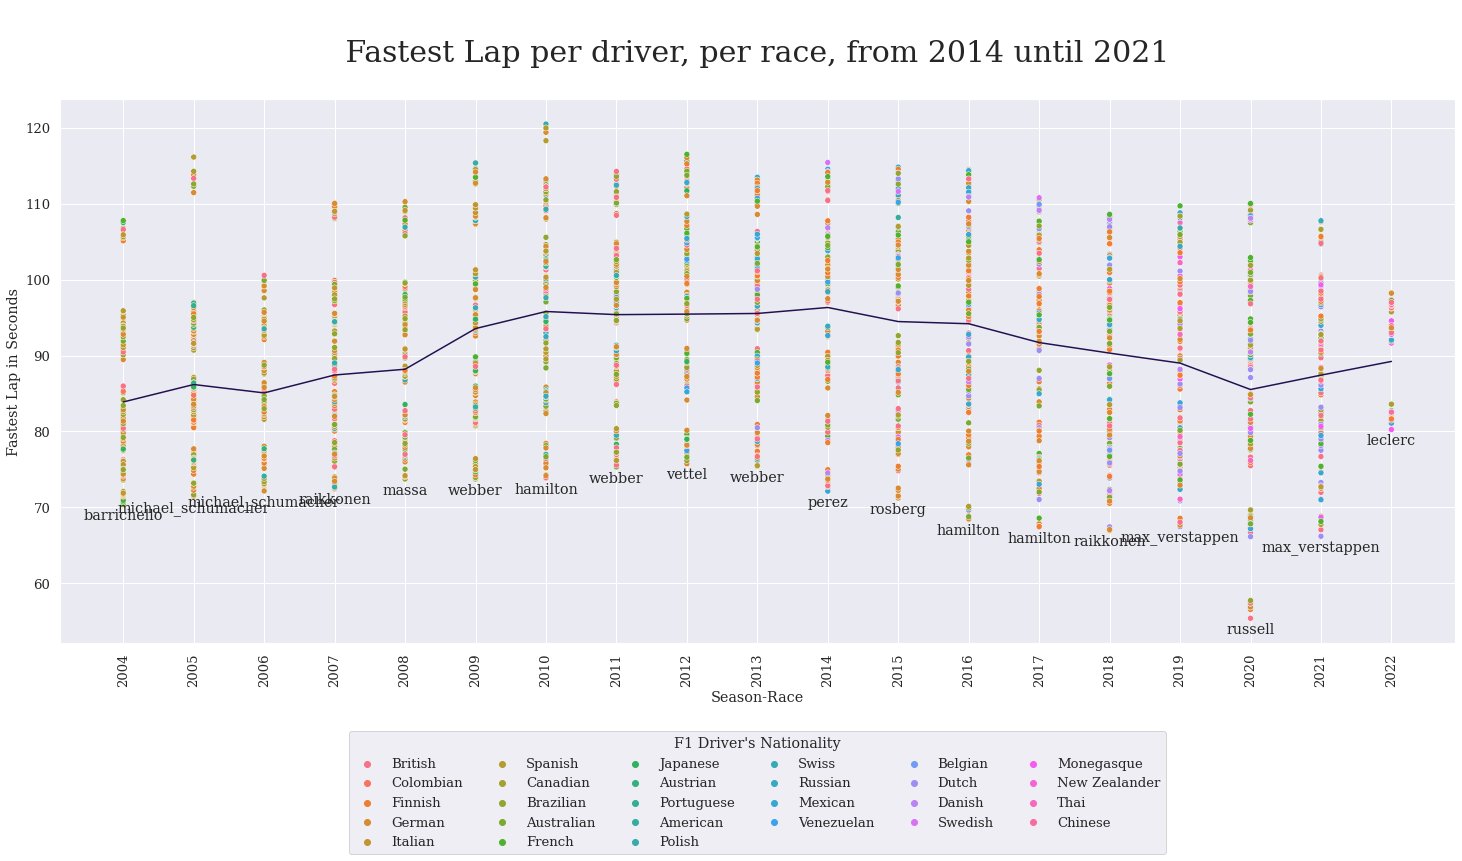

In [171]:
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")
Years=ResultsDF["season"].unique().tolist() #or seasons for plot

#Fastest lap per driver per season
LABELS=pd.DataFrame(columns=["Driver.driverId","FastestLap.Time.time_in_seconds","season"])
for i in ResultsDF[ResultsDF["season"]>=2004]["season"].unique().tolist():
    A=pd.DataFrame(ResultsDF[ResultsDF["season"]==i].groupby(["Driver.driverId"])["FastestLap.Time.time_in_seconds"].min())
    A["season"]=i
    Selected=A[A["FastestLap.Time.time_in_seconds"]==min(A["FastestLap.Time.time_in_seconds"])].reset_index()
    LABELS=pd.concat([LABELS,Selected])

#Plot
fig, ax = plt.subplots(figsize=(25, 10))
sns.scatterplot(x="season", y="FastestLap.Time.time_in_seconds",hue='Driver.nationality',ci=None,estimator="min",
           data=ResultsDF[ResultsDF["status"]=="Finished"])
sns.lineplot(x="season", y="FastestLap.Time.time_in_seconds",estimator="mean",ci=None,
           data=ResultsDF[ResultsDF["status"]=="Finished"])

plt.locator_params(axis="x", nbins = len(Years))
plt.title("\n Fastest Lap per driver, per race, from 2014 until 2021 \n",fontsize=30)
plt.xlabel("Season-Race")
plt.ylabel("Fastest Lap in Seconds")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.4),loc='lower center', title="F1 Driver's Nationality", ncol=6)


#Individual labels of the fastest lap of the season:
for label,y,x in LABELS.to_numpy():
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()



##### Top speed per round from 2014 until 2022 per driver

This plot shows the top speed per race, per driver, per season. It also contains the team of each driver. Hamilton has been the fastest for 7 seasons with Mercedes! It is important to mention that the speed in which cars go depend on the mechanical regulations that the FIA has for each year. We would think that overtime, cars should get faster. Well, that doesn't happen because teams are obliged to satisfy safety and racing mechanical regulations per year.

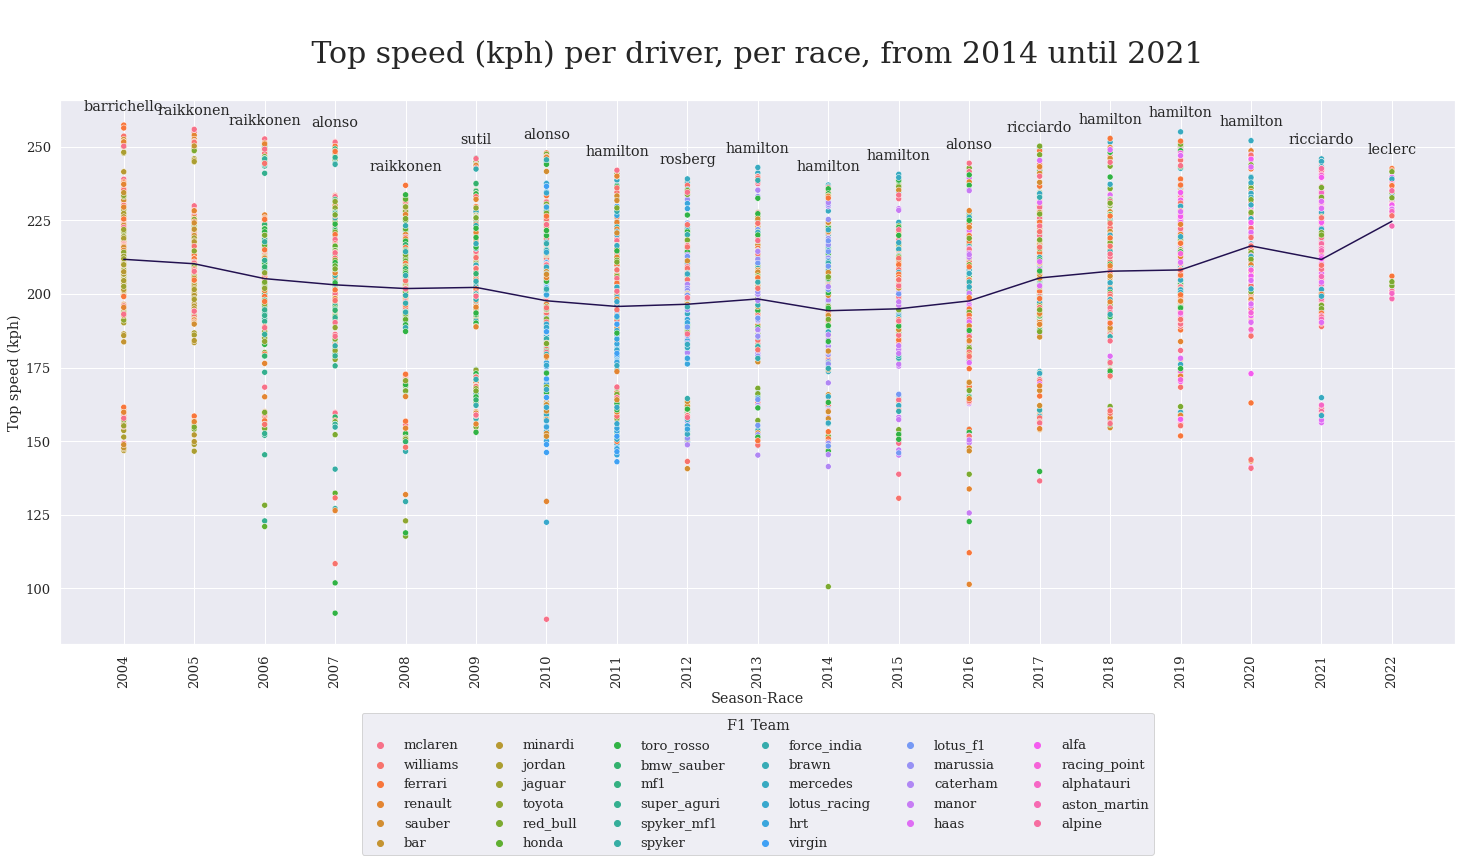

In [172]:
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")
Years=ResultsDF["season"].unique().tolist() #or seasons for plot

#Top speed per driver per season
LABELS=pd.DataFrame(columns=["Driver.driverId",'FastestLap.AverageSpeed.speed',"season"])
for i in ResultsDF[ResultsDF["season"]>=2004]["season"].unique().tolist():
    A=pd.DataFrame(ResultsDF[ResultsDF["season"]==i].groupby(["Driver.driverId"])['FastestLap.AverageSpeed.speed'].max())
    A["season"]=i
    Selected=A[A['FastestLap.AverageSpeed.speed']==max(A['FastestLap.AverageSpeed.speed'])].reset_index()
    LABELS=pd.concat([LABELS,Selected])

#Plot
fig, ax = plt.subplots(figsize=(25, 10))
sns.scatterplot(x="season", y='FastestLap.AverageSpeed.speed',hue='Constructor.constructorId',ci=None,estimator="max",
           data=ResultsDF)
sns.lineplot(x="season", y='FastestLap.AverageSpeed.speed',estimator="mean",ci=None,
           data=ResultsDF)

plt.locator_params(axis="x", nbins = len(Years))
plt.title("\n Top speed (kph) per driver, per race, from 2014 until 2021 \n",fontsize=30)
plt.xlabel("Season-Race")
plt.ylabel("Top speed (kph)")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.4),loc='lower center', title="F1 Team", ncol=6)


#Individual labels of the fastest lap of the season:
for label,y,x in LABELS.to_numpy():
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()


##### Top speed (kph) comparison per team in the last 10 years

In the last 10 years, the F1 has been dominated by Mercedes and Red Bull. This can be seen in the top speed of their cars. In seasons 2011, 2012, and 2013, Red Bull had the highest average top speeds during the season. However, from 2014 and later, this place was taken by Mercedes (except 2017 where Ferrari took the lead).

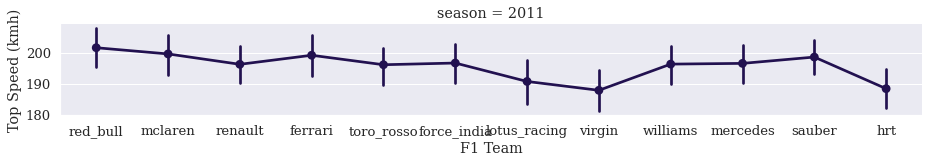

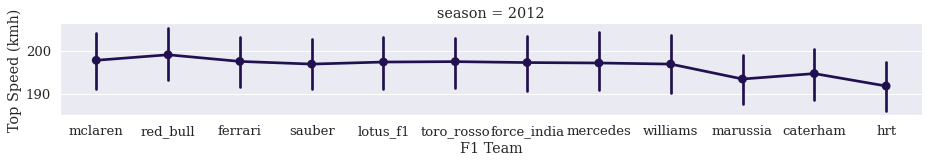

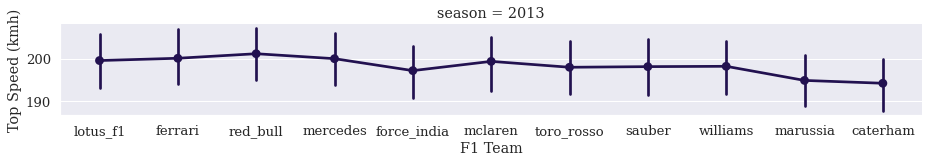

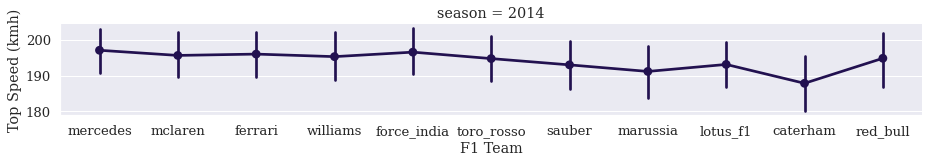

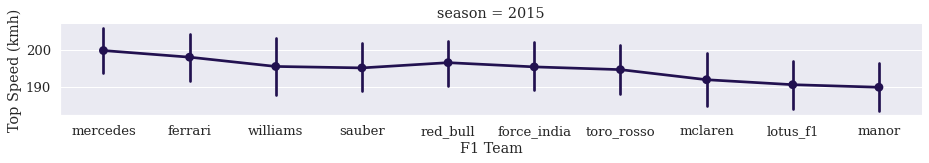

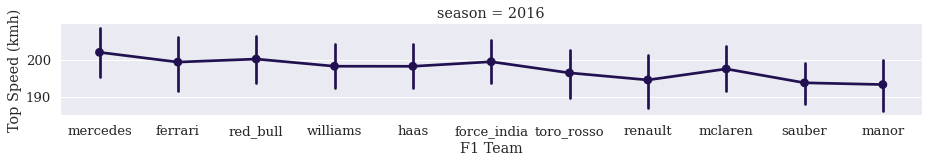

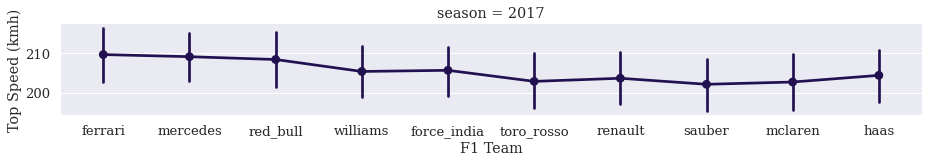

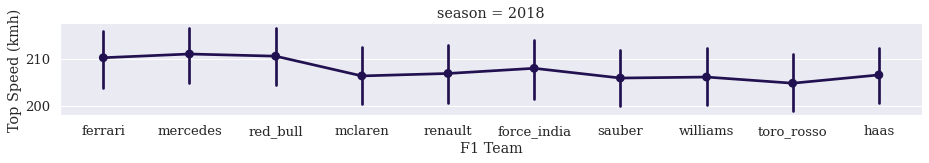

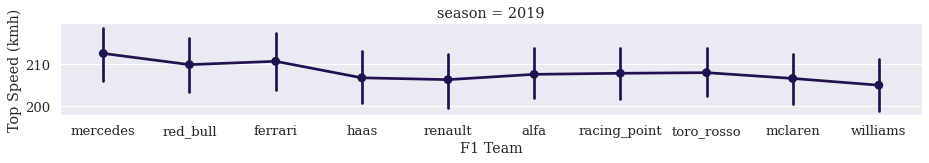

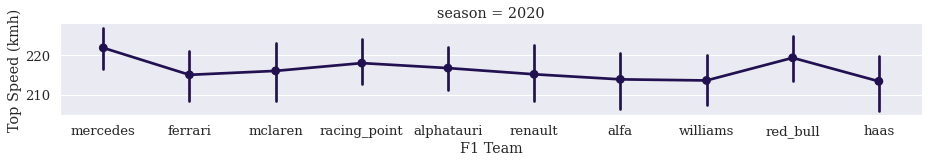

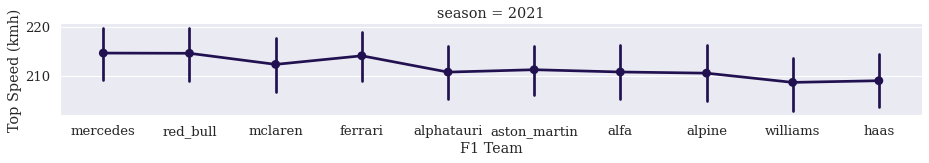

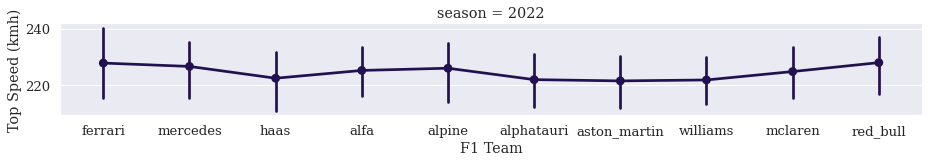

In [173]:
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")


#Plot
for i in Years:
    if i<=2010:
        continue
    else:
        g = sns.catplot(x='Constructor.constructorId', y='FastestLap.AverageSpeed.speed',
        col="season",kind="point",col_wrap=3,height=2.5,aspect=5,
                data=ResultsDF[ResultsDF["season"]==i])
        plt.xlabel("F1 Team")
        plt.ylabel("Top Speed (kmh)")

plt.show()


##### Fastest lap comparison between circuits (2021)

This analysis was done using last 2021 as reference. The fastest circuit in 2021 was the Red Bull Ring and the slowest, Baku.

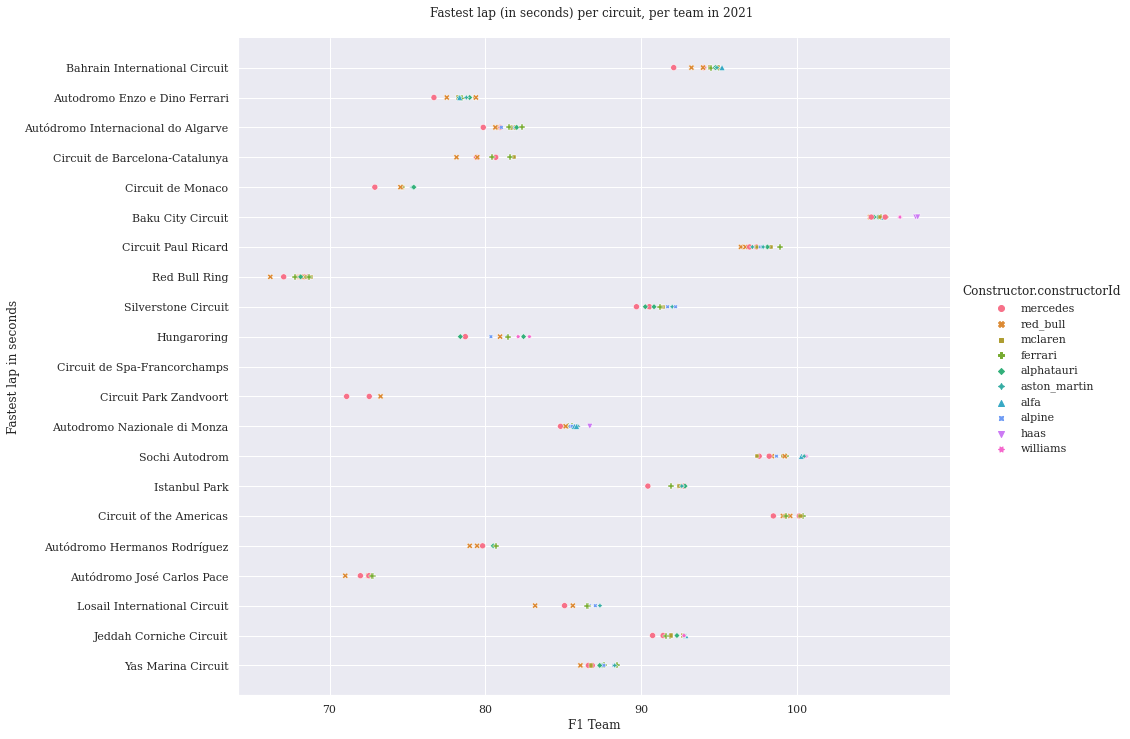

In [174]:
sns.set_theme(style="darkgrid", palette="magma",font_scale=1,font="serif")

g = sns.relplot(x="FastestLap.Time.time_in_seconds", y='Circuit.circuitName',hue='Constructor.constructorId',height=10,aspect=1.4,
        style='Constructor.constructorId',data=ResultsDF[(ResultsDF["season"]==2021) & (ResultsDF["status"]=="Finished")])
plt.title("Fastest lap (in seconds) per circuit, per team in 2021 \n")
plt.xlabel("F1 Team")
plt.ylabel("Fastest lap in seconds")


plt.show()


#### B. Number of wins and points and other statistics for drivers and teams

In [175]:
#Datasets created for the analysis
PositionsPerDriver=pd.DataFrame({'Number' : ResultsDF[ResultsDF['position']<=3].groupby(['position',"Driver.driverId","season"])['position'].count()}).reset_index()
PositionsPerTeam=pd.DataFrame({'Number' : ResultsDF[ResultsDF['position']<=3].groupby(['position','Constructor.constructorId',"season"])['position'].count()}).reset_index()
GridPerDriver=pd.DataFrame({'Number' : ResultsDF[(ResultsDF['grid']==1) | (ResultsDF['grid']==2)].groupby(['grid',"Driver.driverId","season"])['position'].count()}).reset_index()
GridPerTeam=pd.DataFrame({'Number' : ResultsDF[(ResultsDF['grid']==1) | (ResultsDF['grid']==2)].groupby(['grid','Constructor.constructorId',"season"])['position'].count()}).reset_index()


##### Final positions in the podium per driver (2017-2021)

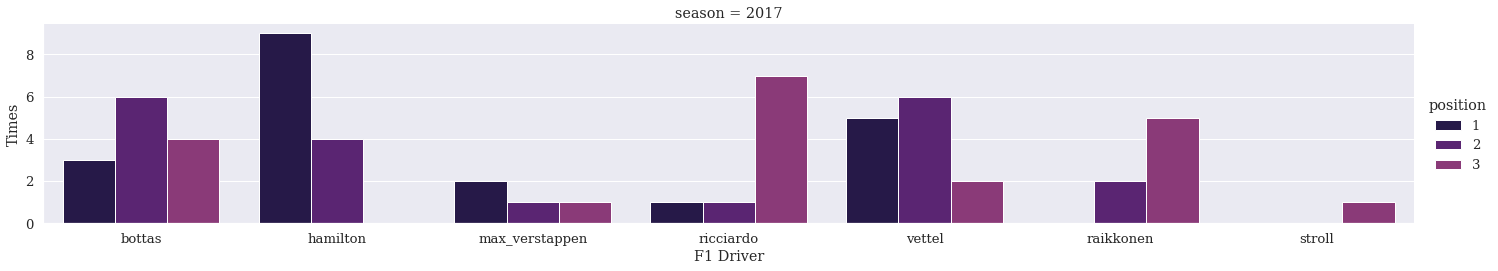

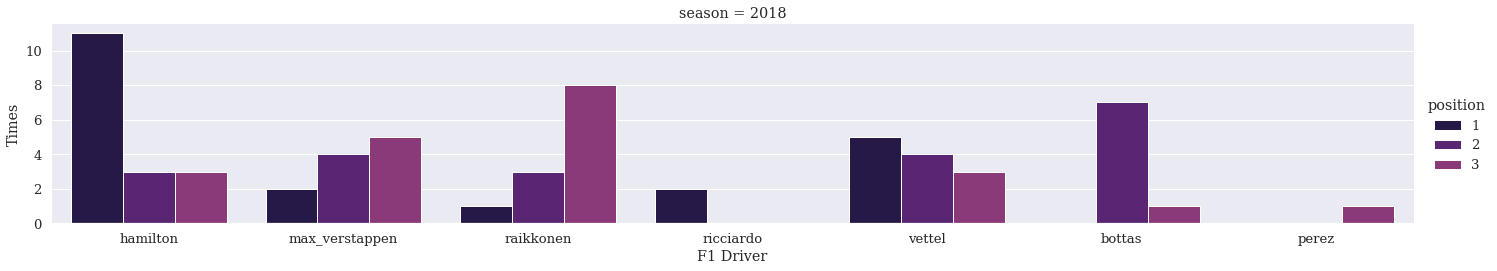

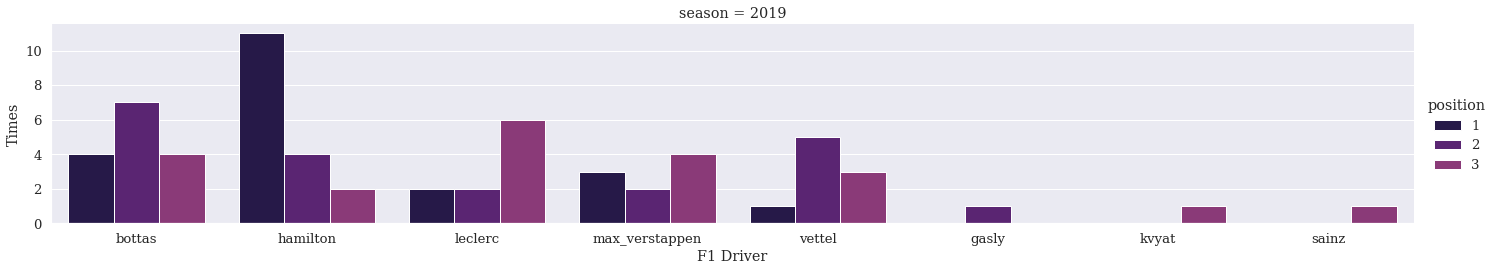

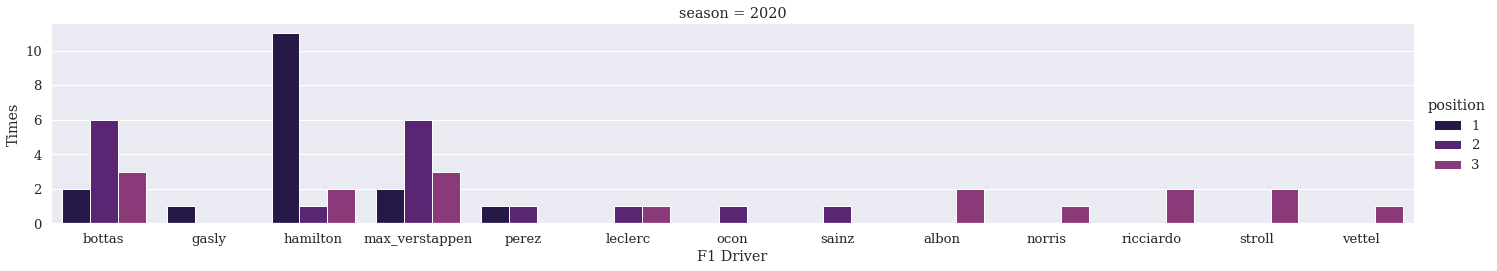

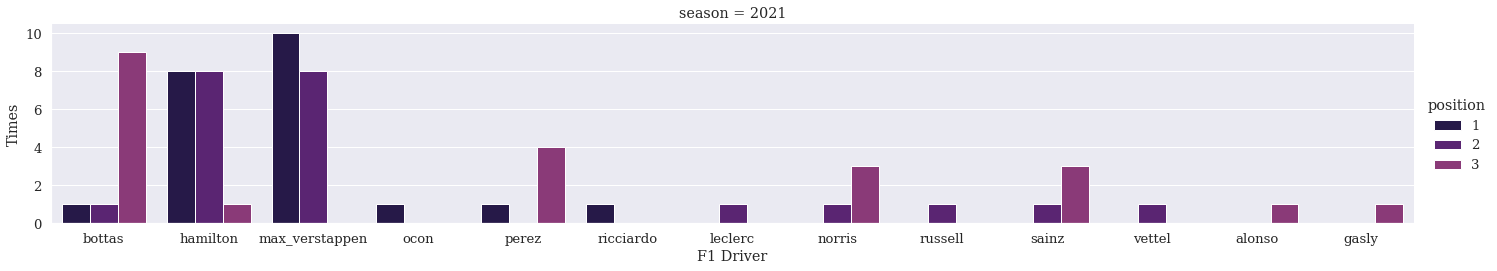

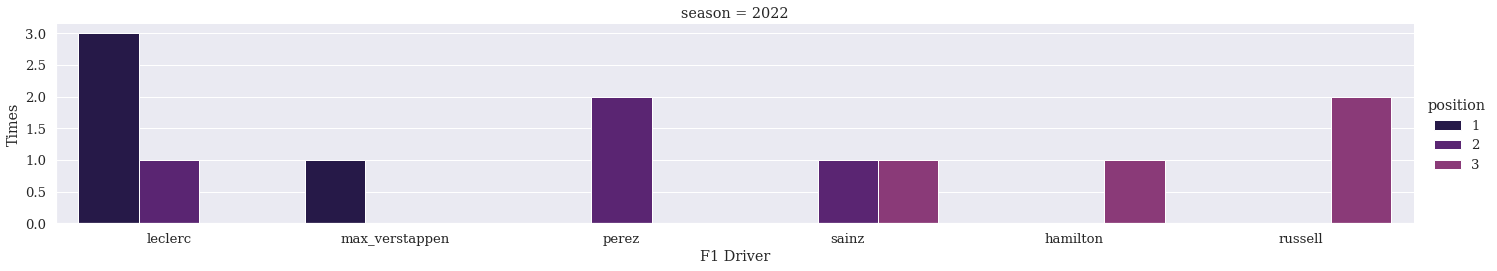

In [176]:
#Ending in top 3 and counting how many times in each position per driver
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")

#Plot
for i in Years:
    if i<=2016:
        continue
    else:
        g = sns.catplot(x='Driver.driverId',y="Number", col="season",kind="bar",height=4,aspect=5,hue="position",
            data=PositionsPerDriver[PositionsPerDriver["season"]==i])
        plt.xlabel("F1 Driver")
        plt.ylabel("Times")

plt.show()

##### Final positions in the podium per team (2017-2021)

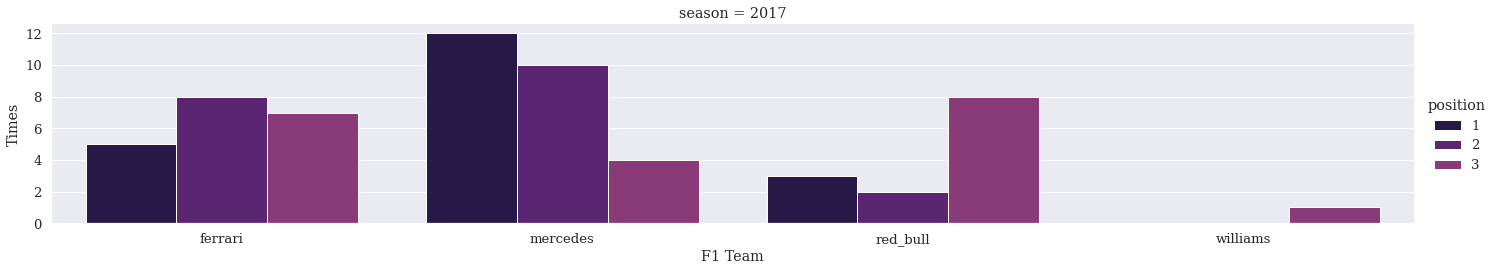

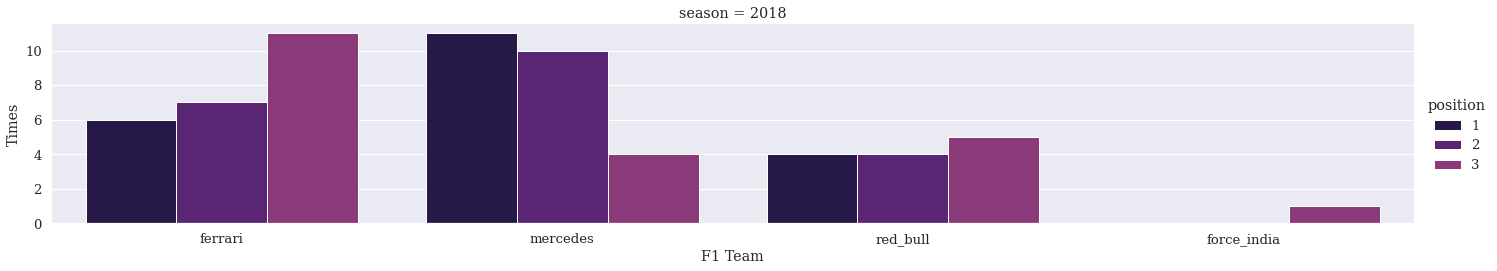

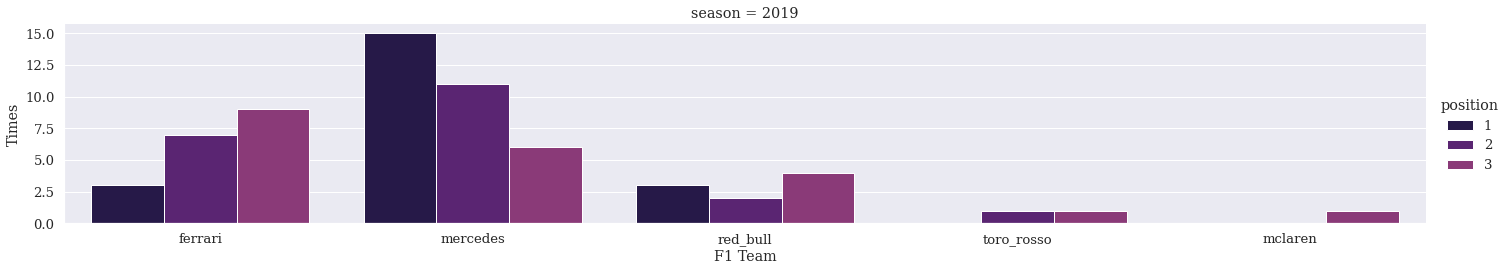

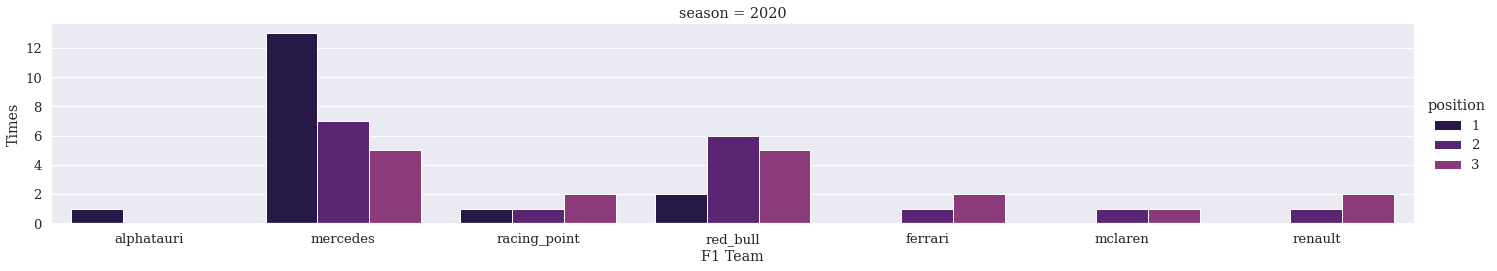

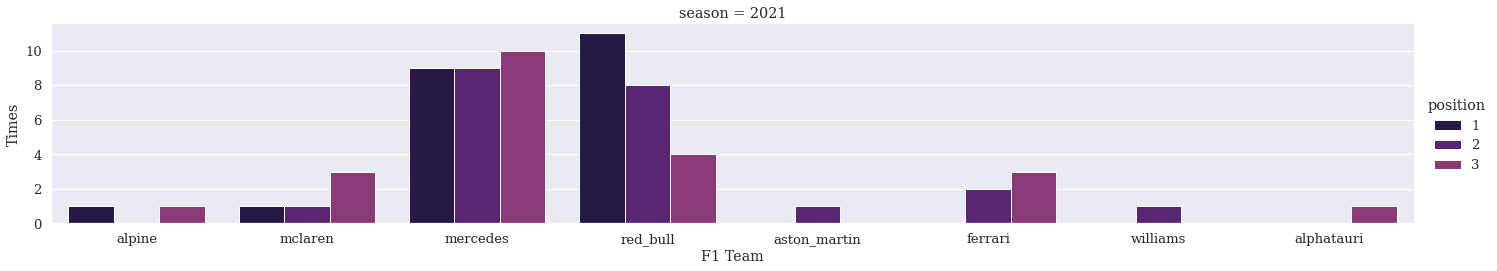

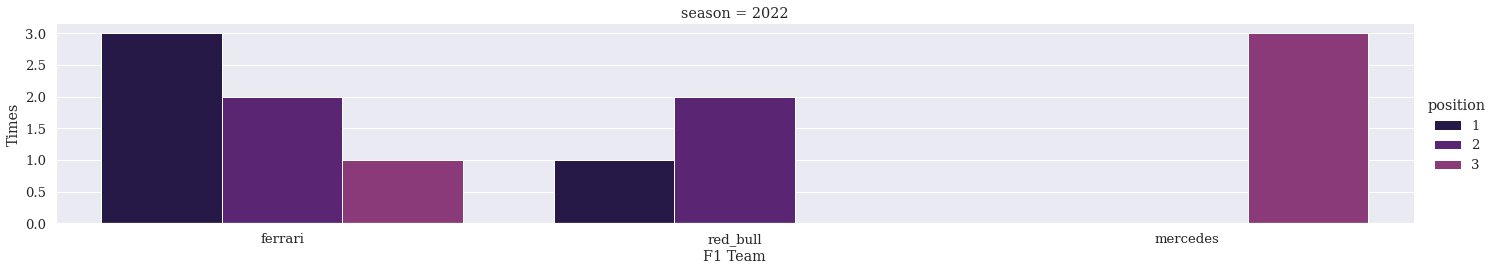

In [177]:
#Ending in top 3 and counting how many times in each position per driver
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")

#Plot
for i in Years:
    if i<=2016:
        continue
    else:
        g = sns.catplot(x='Constructor.constructorId',y="Number", col="season",kind="bar",height=4,aspect=5,hue="position",
            data=PositionsPerTeam[PositionsPerTeam["season"]==i])
        plt.xlabel("F1 Team")
        plt.ylabel("Times")


plt.show()

##### Starting the race in front row per driver (2017-2021)

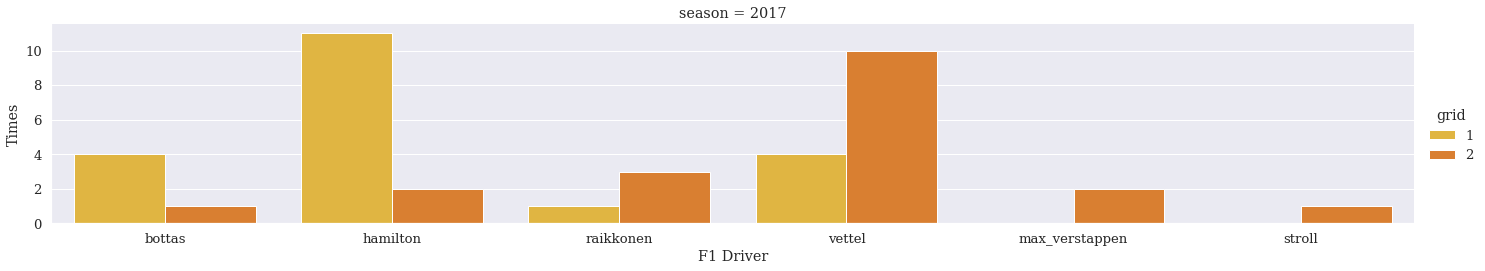

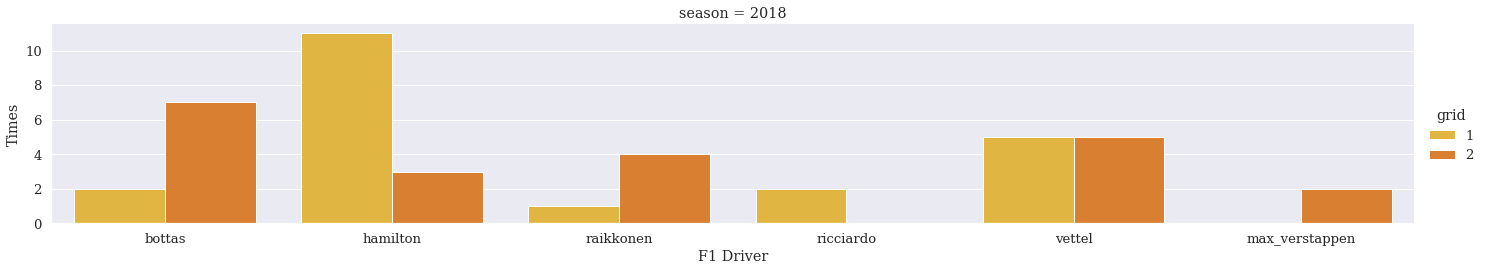

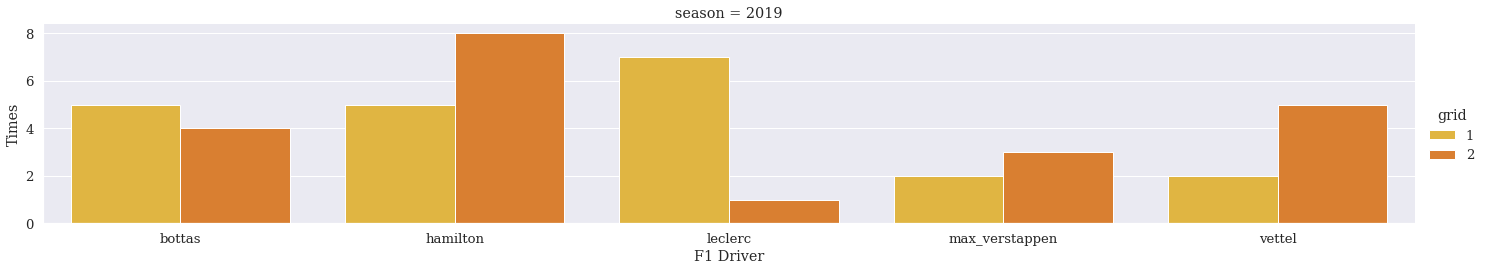

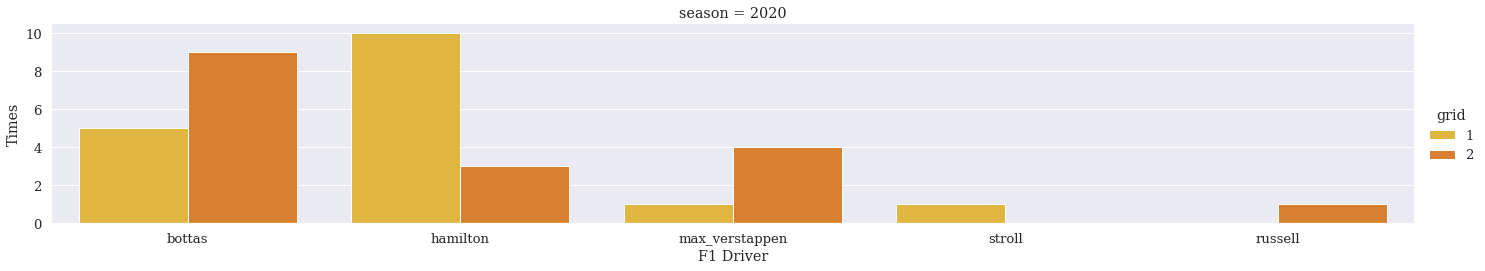

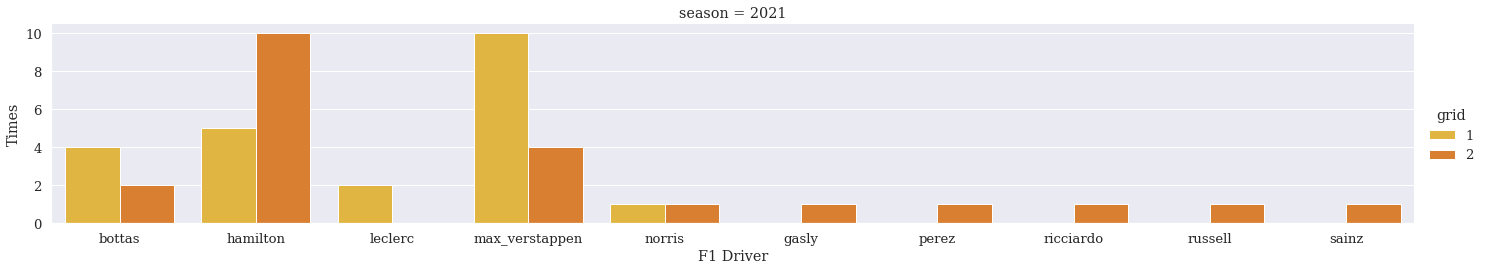

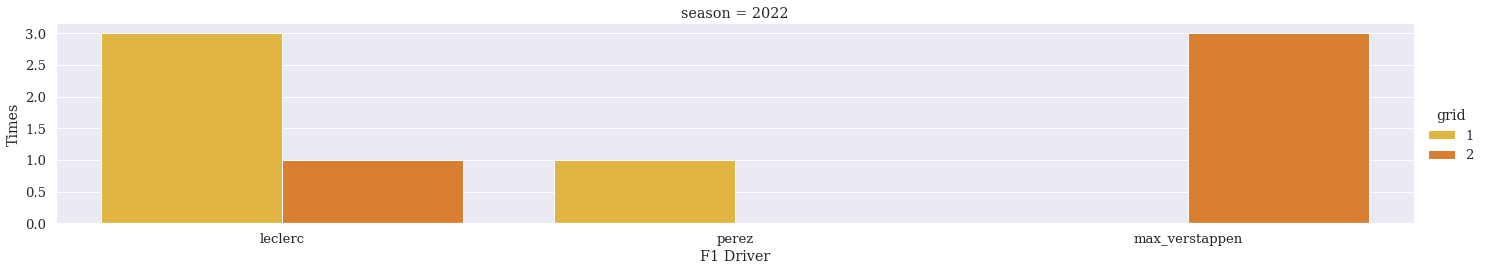

In [178]:
#Front position per driver
sns.set_theme(style="darkgrid", palette="inferno_r",font_scale=1.2,font="serif")

#Plot
for i in Years:
    if i<=2016:
        continue
    else:
        g = sns.catplot(x='Driver.driverId',y="Number", col="season",kind="bar",height=4,aspect=5,hue="grid",
            data=GridPerDriver[GridPerDriver["season"]==i])
        plt.xlabel("F1 Driver")
        plt.ylabel("Times")

plt.show()

##### Starting the race in front row per team (2017-2021)

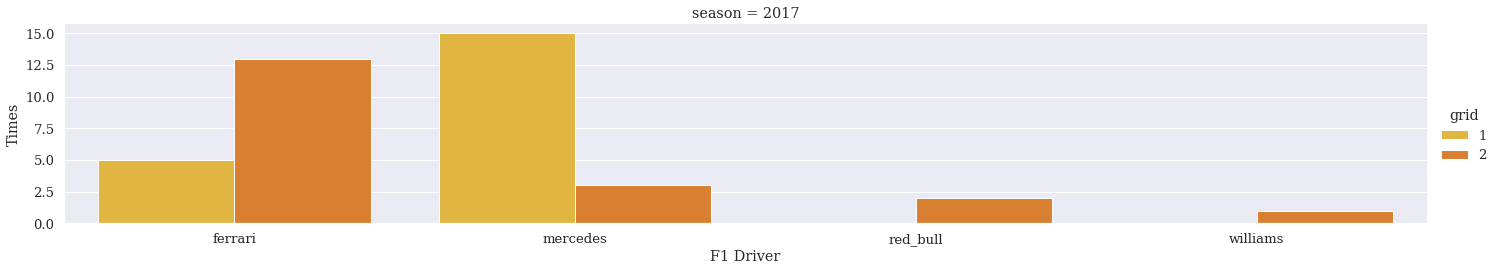

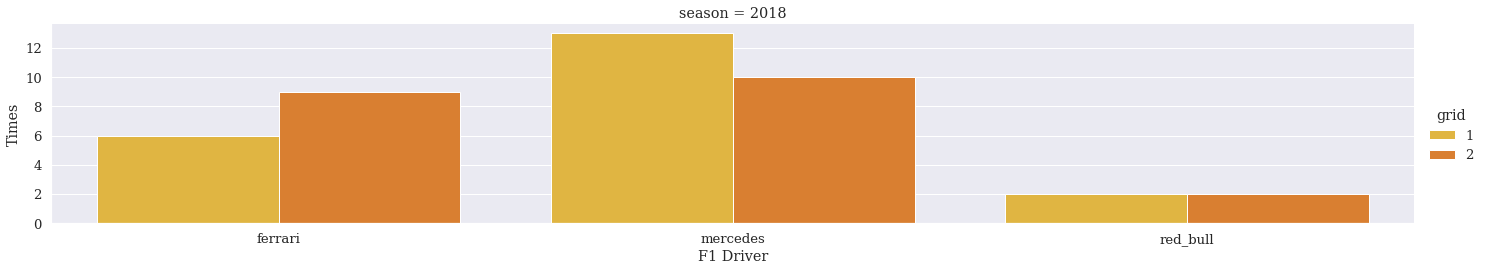

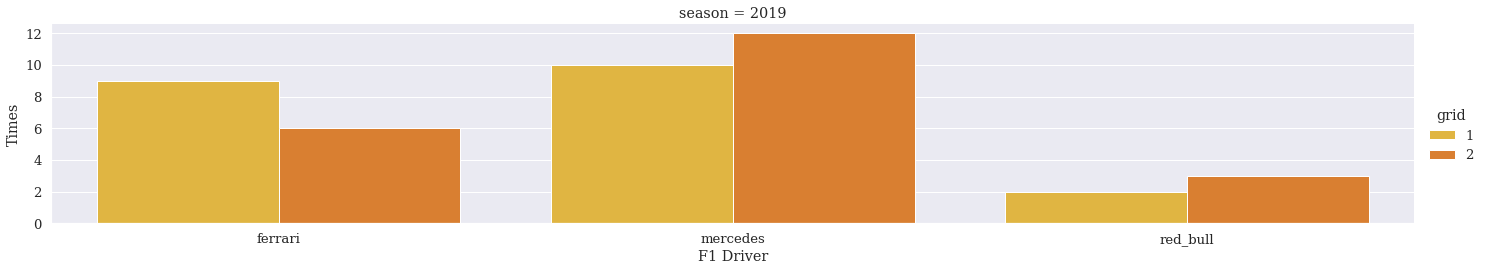

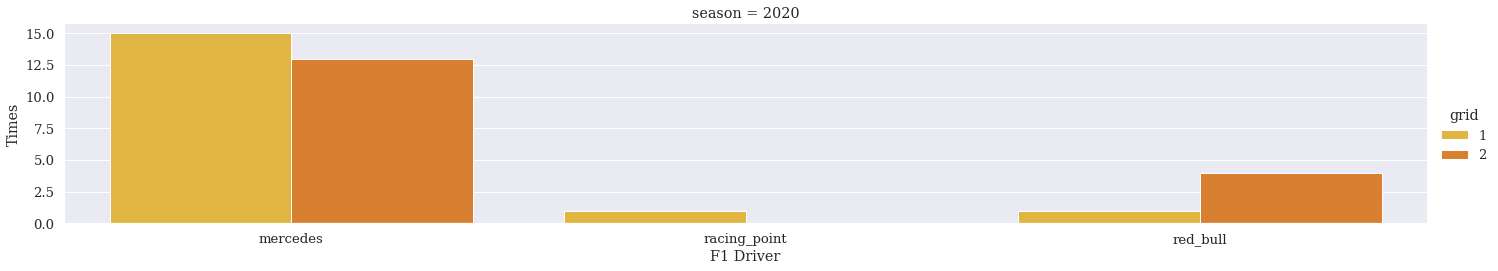

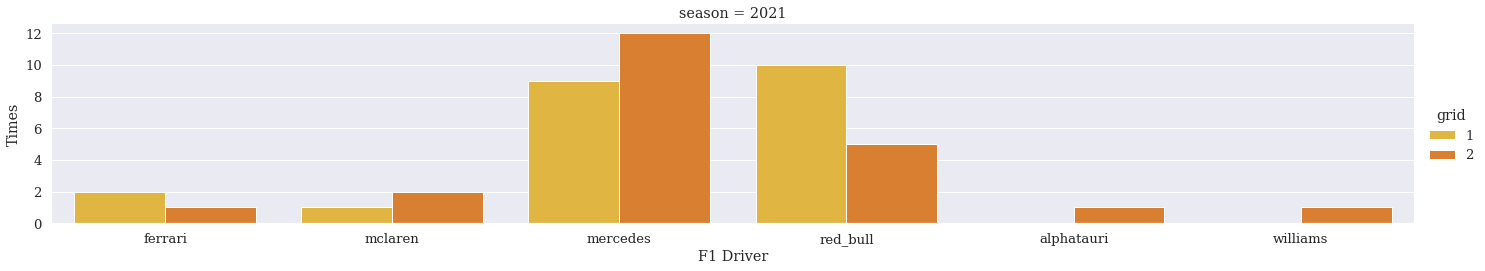

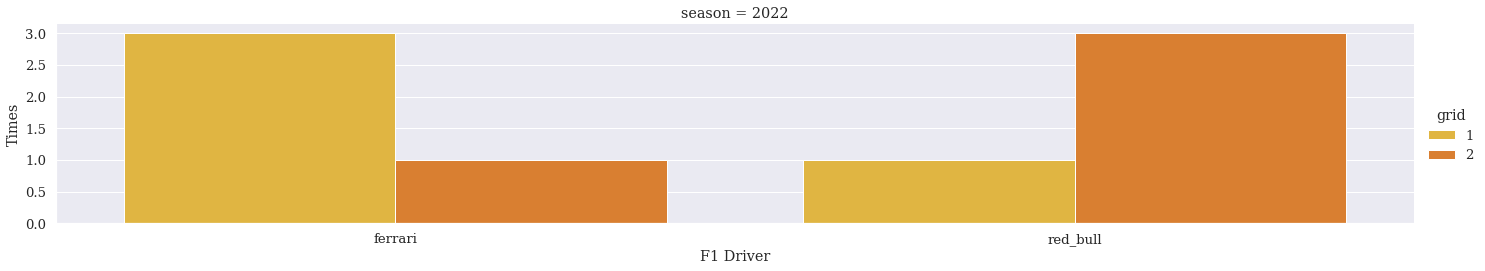

In [179]:
#Front position per driver
sns.set_theme(style="darkgrid", palette="inferno_r",font_scale=1.2,font="serif")

#Plot
for i in Years:
    if i<=2016:
        continue
    else:
        g = sns.catplot(x='Constructor.constructorId',y="Number", col="season",kind="bar",height=4,aspect=5,hue="grid",
            data=GridPerTeam[GridPerTeam["season"]==i])
        plt.xlabel("F1 Driver")
        plt.ylabel("Times")

plt.show()

In [180]:
ResultsDF.columns
ResultsDF['grid'].unique()

array([11,  3, 15,  1, 12,  4, 10,  9,  6,  8, 20, 13, 18,  5,  7, 19, 14,
       16, 17,  2, 22, 21,  0, 23, 24], dtype=int64)

### VI. Random Forest Classifier

#### Functions to test the scores:

In [181]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score #measures used to evaluate the models
from sklearn.metrics import confusion_matrix, classification_report #confusion matrix to evaluate results

from sklearn.model_selection import GridSearchCV #Hyperparameter optimization
from sklearn.model_selection import KFold #set kfold configuration
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.metrics import make_scorer #set scores desired to train models
from sklearn.metrics import mean_squared_error

#Set scorers
f1_scorer=make_scorer(f1_score,average="weighted")
accuracy_scorer=make_scorer(accuracy_score)

### Function to test and evaluate the algorithms
from sklearn import metrics

def evaluating(y_train,y_train_predicted,y_test,y_test_predicted):
    y_true = y_train 
    y_pred = y_train_predicted 

    print("\n Training Scores:")
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
    print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
    print('Max Error:', metrics.max_error(y_true, y_pred))
    print('R^2:', metrics.r2_score(y_true, y_pred))

    print("F1 Score:",f1_score(y_true, y_pred,average="weighted"))
    print("Recall:",recall_score(y_true,y_pred,average="weighted"))
    print("Precision:",precision_score(y_true,y_pred,average="weighted"))

    y_true = y_test 
    y_pred = y_test_predicted 
    
    print("\n Testing Scores:")
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
    print('Max Error:', metrics.max_error(y_true, y_pred))
    print('R^2:', metrics.r2_score(y_true, y_pred))

    print("F1 Score:",f1_score(y_true, y_pred,average="weighted"))
    print("Recall:",recall_score(y_true,y_pred,average="weighted"))
    print("Precision:",precision_score(y_true,y_pred,average="weighted"))

In [182]:
### Function to test and evaluate the algorithms
def testing_the_classifier(tickstrain,tickstest,thesize=(10,10)):
    Train=pd.DataFrame()
    Train["Predicted"]=y_train_predicted
    Train["Real"]=y_train.tolist()

    Test=pd.DataFrame()
    Test["Predicted"]=y_test_predicted
    Test["Real"]=y_test.tolist()

    #Generate the confusion matrixes

    cf_matrixtrain = confusion_matrix(Train["Real"], Train["Predicted"])
    cf_matrixtest = confusion_matrix(Test["Real"], Test["Predicted"])

    print("\n Training Data:")
    sns.set_theme(style="whitegrid", palette="BuPu",font_scale=1,font="serif")
    plt.figure(figsize=thesize)
    ax = sns.heatmap(cf_matrixtrain, annot=True,cmap="BuPu",fmt='d')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(tickstrain)
    ax.yaxis.set_ticklabels(tickstrain)
    plt.show()

    print(classification_report(y_train, y_train_predicted))

    print("F1 Score:",f1_score(y_train, y_train_predicted,average="weighted"))
    print("Recall:",recall_score(y_train,y_train_predicted,average="weighted"))
    print("Precision:",precision_score(y_train,y_train_predicted,average="weighted"))

    

    print("\n Testing Data:")
    sns.set_theme(style="whitegrid", palette="BuPu",font_scale=1,font="serif")
    plt.figure(figsize=thesize)
    ax = sns.heatmap(cf_matrixtest, annot=True,cmap="BuPu",fmt='d')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(tickstest)
    ax.yaxis.set_ticklabels(tickstest)
    plt.show()

    print(classification_report(y_test, y_test_predicted))

    print("F1 Score:",f1_score(y_test, y_test_predicted,average="weighted"))
    print("Recall:",recall_score(y_test, y_test_predicted,average="weighted"))
    print("Precision:",precision_score(y_test, y_test_predicted,average="weighted"))

#### Handling null values

In [183]:
#Filling rows that dont have the prev race time to the max value posible, this becasue it is the longest we have seen that a car has finished a race.
SelectedResults['Prev_Time.millis'].fillna(SelectedResults['Prev_Time.millis'].max(),inplace=True)

#Filling the rows with no prev rank with the max value posible, this becasue it is the lowest they can go. This happens when a pilot debuts, if we put 0, the values can get messed up
SelectedResults['Prev_FastestLap.rank'].fillna(SelectedResults['Prev_FastestLap.rank'].max(),inplace=True)
SelectedResults['Prev_FastestLap.rank']=SelectedResults['Prev_FastestLap.rank'].replace(0,SelectedResults['Prev_FastestLap.rank'].max())
SelectedResults['Prev_FastestLap.rank'].unique()

#Filling the rows with 0 of the fastest prev lap. 0 Becasue it can give indicative that  if it it already passed the chance of being the fastest now it will be difficult
SelectedResults["Prev_FastestLap.lap"].fillna(0,inplace=True)

#Filling the value of the fastest previous lap with the max number available, this because if it did not have infoabout prv lap. It possibly means that the  prev race they did not had a fastest lap becasue they did not end the race 
SelectedResults["Prev_FastestLap.Time.time_in_seconds"].fillna(SelectedResults["Prev_FastestLap.Time.time_in_seconds"].max(),inplace=True)

#Filling the prev speed with the lowest speed possible
SelectedResults["Prev_FastestLap.AverageSpeed.speedKph"].fillna(SelectedResults["Prev_FastestLap.AverageSpeed.speedKph"].min(),inplace=True)

#Filling the prev status with "not spcified"
SelectedResults['Prev_status']=SelectedResults['Prev_status'].replace(0,"Not Specified")


# #Filling Q1 with max value posible+1 second
SelectedResults["Q1_in_seconds"].fillna(SelectedResults["Q1_in_seconds"].max(),inplace=True)

# #Filling Q2 with max value posible+1 second
SelectedResults["Q2_in_seconds"].fillna(SelectedResults["Q2_in_seconds"].max(),inplace=True)

# #Filling Q3 with max value posible+1 second
SelectedResults["Q3_in_seconds"].fillna(SelectedResults["Q3_in_seconds"].max(),inplace=True)


#### Creating dataframe and seeing correlation between features preselected

In [184]:
ResultsExpandedDF=createResultsExpanded(0.70,5) #percentile #number of previous laps information

In [185]:
status_encoder = LabelEncoder()
status_encoder.fit(ResultsExpandedDF['Prev_status'])
status_values=status_encoder.transform(ResultsExpandedDF['Prev_status'])
ResultsExpandedDF['Prev_status_encoded']=status_values

In [186]:
cont=['position_final_race','Prev_Time.millis','Prev_FastestLap.Time.time_in_seconds',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Prev_FastestLap.AverageSpeed.speedKph',
       'Fastest_per_driver', 'Fastest_per_race','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs']
cat=['position_final_race','grid', 'laps_total_race','season', 'round','driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']
ResultsExpandedDF.columns

# print(len(cat),len(cont),len(ResultsExpandedDF.columns))


Index(['Season-Round', 'Season-Round-DriverID', 'position_final_race',
       'points', 'grid', 'laps_total_race', 'status', 'driverId',
       'Driver.nationality', 'Constructor.constructorId',
       'Constructor.nationality', 'season', 'round', 'Time.millis',
       'FastestLap.rank', 'FastestLap.lap', 'FastestLap.Time.time_in_seconds',
       'FastestLap.AverageSpeed.speedKph', 'driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid', 'Prev_Time.millis',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap',
       'Prev_FastestLap.Time.time_in_seconds',
       'Prev_FastestLap.AverageSpeed.speedKph', 'Prev_status', 'Q1_in_seconds',
       'Q2_in_seconds', 'Q3_in_seconds', 'Fastest_per_driver',
       'Fastest_per_race', 'laps_considered', 'lap_1_duration_secs',
       'position_1', 'lap_2_duration_secs', 'position_2',
       'lap_3_duration_secs', 'position_3', 'lap_4_duration_secs',
       'position

In [187]:
#ResultsExpandedDF[cont].corr(method='pearson')["position_final_race"]
#ResultsExpandedDF[cat].corr(method='kendall')["position_final_race"]

<AxesSubplot:>

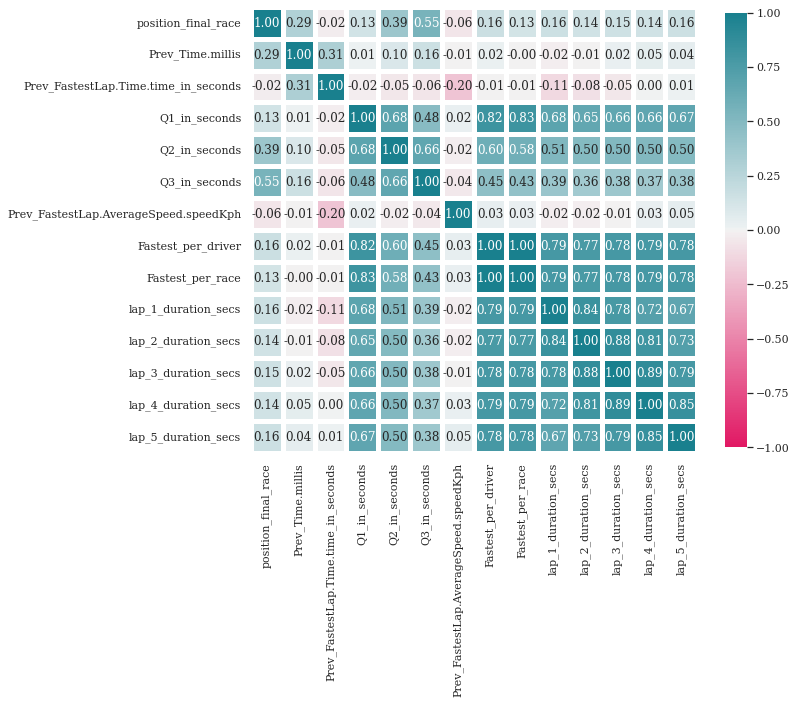

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculating correlation: Heatmap
sns.set_theme(style="whitegrid", palette="magma",font_scale=1,font="serif")
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(0, 210, 95, 49, as_cmap=True)
sns.heatmap(ResultsExpandedDF[cont].corr(method='pearson'), annot=True, fmt=".2f", 
           linewidths=5,cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

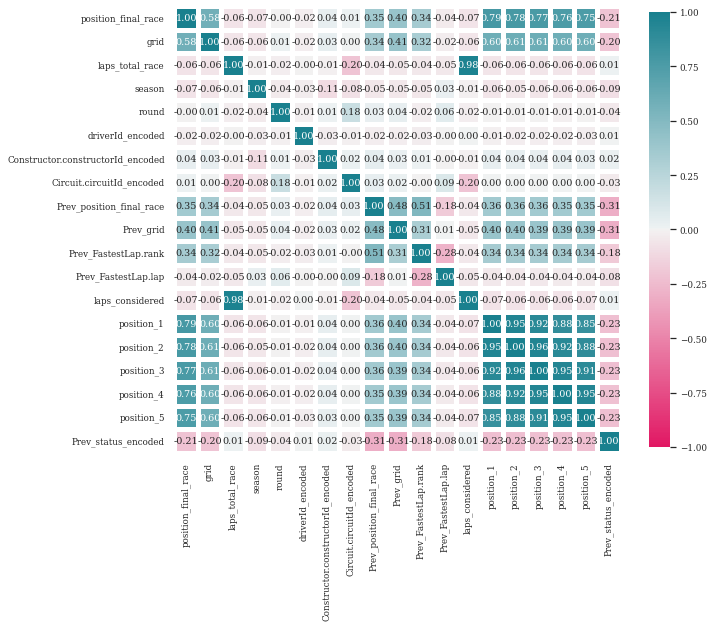

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculating correlation: Heatmap
sns.set_theme(style="whitegrid", palette="magma",font_scale=0.8,font="serif")
fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(0, 210, 95, 49, as_cmap=True)
sns.heatmap(ResultsExpandedDF[cat].corr(method='kendall'), annot=True, fmt=".2f", 
           linewidths=5,cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

plt.show()

#### Training and testing

In [190]:
independent_original=['Prev_Time.millis','Prev_FastestLap.Time.time_in_seconds',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Prev_FastestLap.AverageSpeed.speedKph',
       'Fastest_per_driver', 'Fastest_per_race','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs','grid', 'laps_total_race','season', 'round','driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']

independent_1=['Prev_Time.millis','Prev_FastestLap.Time.time_in_seconds',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Prev_FastestLap.AverageSpeed.speedKph',
       'Fastest_per_driver', 'Fastest_per_race','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs','grid', 'laps_total_race','season', 'round','driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']

independent_2=['Prev_Time.millis','Prev_FastestLap.Time.time_in_seconds',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Prev_FastestLap.AverageSpeed.speedKph',
       'Fastest_per_driver', 'Fastest_per_race','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs','grid', 'laps_total_race','season','driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']

independent_3=['Prev_Time.millis','Prev_FastestLap.Time.time_in_seconds',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Prev_FastestLap.AverageSpeed.speedKph',
       'Fastest_per_driver', 'Fastest_per_race','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs','grid', 'laps_total_race','season','driverId_encoded',
       'Constructor.constructorId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']

independent_4=['Prev_Time.millis','Prev_FastestLap.Time.time_in_seconds',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Prev_FastestLap.AverageSpeed.speedKph',
       'Fastest_per_driver', 'Fastest_per_race','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs','grid', 'laps_total_race','season',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']

ind5=['Prev_Time.millis',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Fastest_per_driver','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs', 'laps_total_race','season','driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']

ind6=["Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",'lap_1_duration_secs',
       'Fastest_per_driver', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs', 'laps_total_race','season','driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']

ind7=['Prev_Time.millis',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Fastest_per_driver','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs','season','laps_total_race','driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5']

dependent='position_final_race'


In [195]:
ResultsExpandedDF[dependent].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [192]:
#Divide data into training and testing - stratified
from sklearn.model_selection import train_test_split #separte train and test data

X_train, X_test, y_train, y_test = train_test_split(ResultsExpandedDF[ind7], ResultsExpandedDF[dependent], test_size=0.20,random_state=1994)


In [193]:
import sklearn

from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100,random_state=1994)
RF.fit(X_train,y_train)
y_train_predicted=RF.predict(X_train)
y_test_predicted=RF.predict(X_test)

mse_train = mean_squared_error(y_train,y_train_predicted)
mse_test = mean_squared_error(y_test,y_test_predicted)
print(mse_train,"-",mse_test)


0.0 - 4.12289156626506


In [194]:
evaluating(y_train,y_train_predicted,y_test,y_test_predicted)


 Training Scores:
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Explained Variance Score: 1.0
Max Error: 0
R^2: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0

 Testing Scores:
Mean Absolute Error (MAE): 1.2891566265060241
Mean Squared Error (MSE): 4.12289156626506
Max Error: 9
R^2: 0.7238321893513218
F1 Score: 0.35585350214947903
Recall: 0.3614457831325301
Precision: 0.35683423029679523


In [ ]:
TRAINN=np.unique(y_train_predicted)
TESTT=np.unique(y_test_predicted)
if len(TRAINN)>len(TESTT):
    positions=TRAINN
else:
    positions=TESTT


 Training Data:


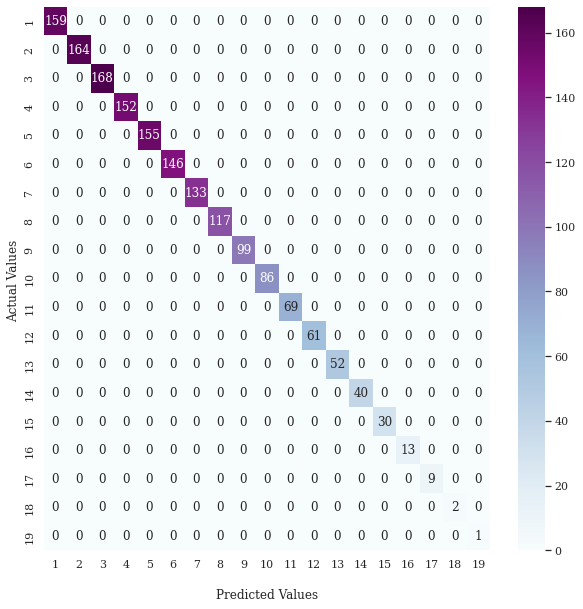

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       152
           5       1.00      1.00      1.00       155
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       133
           8       1.00      1.00      1.00       117
           9       1.00      1.00      1.00        99
          10       1.00      1.00      1.00        86
          11       1.00      1.00      1.00        69
          12       1.00      1.00      1.00        61
          13       1.00      1.00      1.00        52
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        13
          17       1.00      1.00      1.00         9
          18       1.00    

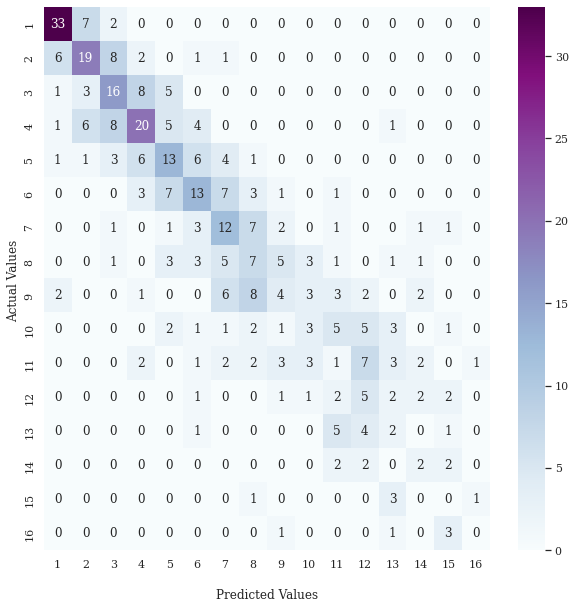

              precision    recall  f1-score   support

           1       0.75      0.79      0.77        42
           2       0.53      0.51      0.52        37
           3       0.41      0.48      0.44        33
           4       0.48      0.44      0.46        45
           5       0.36      0.37      0.37        35
           6       0.38      0.37      0.38        35
           7       0.32      0.41      0.36        29
           8       0.23      0.23      0.23        30
           9       0.22      0.13      0.16        31
          10       0.23      0.12      0.16        24
          11       0.05      0.04      0.04        27
          12       0.20      0.31      0.24        16
          13       0.12      0.15      0.14        13
          14       0.20      0.25      0.22         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5

    accuracy                           0.36       415
   macro avg       0.28   

In [196]:
testing_the_classifier(TRAINN,TESTT)

25

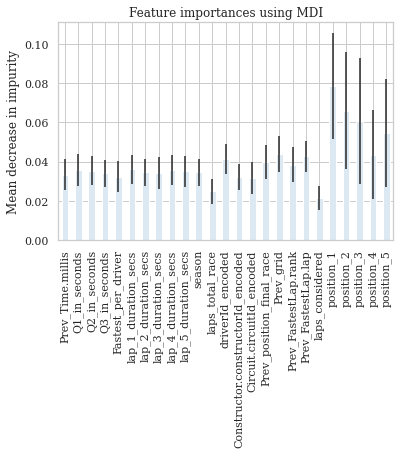

In [ ]:
RF.feature_importances_



importances = RF.feature_importances_
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=ind7)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

len(ind7)


In [ ]:
       
# independent_original=['Prev_Time.millis','Prev_FastestLap.Time.time_in_seconds',
#        "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
#        'Prev_FastestLap.AverageSpeed.speedKph',
#        'Fastest_per_driver', 'Fastest_per_race','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
#        'lap_4_duration_secs', 'lap_5_duration_secs', 'laps_total_race','season', 'round','driverId_encoded',
#        'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
#        'Prev_position_final_race', 'Prev_grid',
#        'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
#        'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']

# #despues de primer analisis se quitaron 3      
# independent_original=['Prev_Time.millis',
#        "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
#        'Fastest_per_driver','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
#        'lap_4_duration_secs', 'lap_5_duration_secs', 'laps_total_race','season', 'round','driverId_encoded',
#        'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
#        'Prev_position_final_race', 'Prev_grid',
#        'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
#        'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']

#despues de primer analisis se quito 1 mas    
# independent_original=['Prev_Time.millis',
#        "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
#        'Fastest_per_driver','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
#        'lap_4_duration_secs', 'lap_5_duration_secs', 'laps_total_race','season','driverId_encoded',
#        'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
#        'Prev_position_final_race', 'Prev_grid',
#        'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
#        'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded']


independent_original=['Prev_Time.millis',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Fastest_per_driver','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs','season','laps_total_race','driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5']
#esta es la que se qudo despues de varias pruebas

np.random.seed(1994)

def back(measure):
    len_ind=len(independent_original)
    for i in range(len_ind):
       a=independent_original[:i]
       b=independent_original[i+1:]
       c=a+b
       X_train, X_test, y_train, y_test = train_test_split(ResultsExpandedDF[c], ResultsExpandedDF[dependent], test_size=0.20,random_state=1994)
       X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train, test_size=0.20,random_state=1994)
       measureslist=[]
       for r in range(100):
          RF=RandomForestClassifier(n_estimators=10)
          RF.fit(X_trainn,y_trainn)
          y_val_predicted=RF.predict(X_val)
          
          y_true = y_val 
          y_pred = y_val_predicted
          measureslist+=[measure(y_true, y_pred)]
          measures_array=np.array(measureslist)
          avgmeasures=np.mean(measures_array)
       print("erased: ",independent_original[i],' - ',str(avgmeasures))

def backf1():
    len_ind=len(independent_original)
    for i in range(len_ind):
       a=independent_original[:i]
       b=independent_original[i+1:]
       c=a+b
       X_train, X_test, y_train, y_test = train_test_split(ResultsExpandedDF[c], ResultsExpandedDF[dependent], test_size=0.20,random_state=1994)
       X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train, test_size=0.20)
       measureslist=[]
       for r in range(100):
          RF=RandomForestClassifier(n_estimators=10)
          RF.fit(X_trainn,y_trainn)
          y_val_predicted=RF.predict(X_val)
          
          y_true = y_val 
          y_pred = y_val_predicted
          measureslist+=[f1_score(y_true, y_pred,average="weighted")]
          measures_array=np.array(measureslist)
          avgmeasures=np.mean(measures_array)
       print("erased: ",independent_original[i],' - ',str(avgmeasures))



def backtotalf1():
   len_ind=len(independent_original)

   X_train, X_test, y_train, y_test = train_test_split(ResultsExpandedDF[independent_original], ResultsExpandedDF[dependent], test_size=0.20,random_state=1994)
   X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train, test_size=0.20)
   measureslist=[]
   for r in range(100):
      RF=RandomForestClassifier(n_estimators=100)
      RF.fit(X_trainn,y_trainn)
      y_val_predicted=RF.predict(X_val)
      
      y_true = y_val 
      y_pred = y_val_predicted
      measureslist+=[f1_score(y_true, y_pred,average="weighted")]
      measures_array=np.array(measureslist)
      avgmeasures=np.mean(measures_array)
   print(' - ',str(avgmeasures))

def backtotal(measure):
   len_ind=len(independent_original)

   X_train, X_test, y_train, y_test = train_test_split(ResultsExpandedDF[independent_original], ResultsExpandedDF[dependent], test_size=0.20,random_state=1994)
   X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train, test_size=0.20)
   measureslist=[]
   for r in range(100):
      RF=RandomForestClassifier(n_estimators=100)
      RF.fit(X_trainn,y_trainn)
      y_val_predicted=RF.predict(X_val)
      
      y_true = y_val 
      y_pred = y_val_predicted
      measureslist+=[measure(y_true, y_pred)]
      measures_array=np.array(measureslist)
      avgmeasures=np.mean(measures_array)
   print(' - ',str(avgmeasures))

In [ ]:
#backf1()
#back(metrics.mean_absolute_error)
#back(accuracy_score)
print(backtotalf1(),backtotal(accuracy_score),backtotal(metrics.mean_absolute_error))

 -  0.3922820586897506
 -  0.3664156626506023
 -  1.2834036144578311
None None None


In [ ]:
#SelectedResults[['season']] #min 2012-2022
#SelectedResults[["round"]].min() #1
SelectedResults[["round"]].max() #22
SelectedResults.groupby(["season"])["round"].max()
SelectedResults[SelectedResults["status"]=="Finished"].groupby(["season"])['laps_total_race'].max() #MAX87 #min 44

season
2012    78
2013    78
2014    78
2015    78
2016    78
2017    78
2018    78
2019    78
2020    87
2021    78
2022    58
Name: laps_total_race, dtype: int64

<AxesSubplot:xlabel='position_final_race', ylabel='Count'>

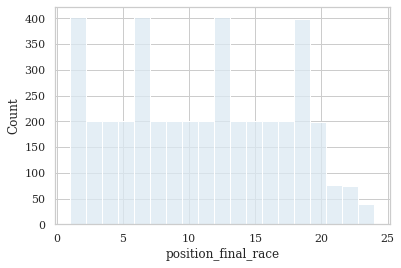

In [ ]:
#SelectedResults[SelectedResults['position_final_race']==3].count()
sns.histplot(data=SelectedResults, x='position_final_race',stat="count")

In [ ]:
SelectedResults.groupby('position_final_race')['position_final_race'].count()

position_final_race
1     201
2     201
3     201
4     201
5     201
6     201
7     201
8     201
9     201
10    201
11    201
12    201
13    201
14    201
15    201
16    201
17    201
18    201
19    198
20    198
21     76
22     75
23     20
24     20
Name: position_final_race, dtype: int64

In [ ]:
SelectedResults.columns

Index(['Season-Round', 'Season-Round-DriverID', 'position_final_race',
       'points', 'grid', 'laps_total_race', 'status', 'driverId',
       'Driver.nationality', 'Constructor.constructorId',
       'Constructor.nationality', 'season', 'round', 'Time.millis',
       'FastestLap.rank', 'FastestLap.lap', 'FastestLap.Time.time_in_seconds',
       'FastestLap.AverageSpeed.speedKph', 'driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid', 'Prev_Time.millis',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap',
       'Prev_FastestLap.Time.time_in_seconds',
       'Prev_FastestLap.AverageSpeed.speedKph', 'Prev_status', 'Q1_in_seconds',
       'Q2_in_seconds', 'Q3_in_seconds'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Cross Validation using Grid Search
RF=RandomForestClassifier(n_estimators=200,criterion="entropy",bootstrap=True,class_weight="balanced_subsample",max_features=None)
tuned_parameters = {
    # "n_estimators":[200], #gini con 100 y entropy con 150. Wins entropy con 150
    # 'criterion': ["gini","entropy"], ##entrophy with 200
    'max_depth': [None,20,30],
    'min_samples_split': [2,3,5], #only 2 and 3, not 5
    'min_samples_leaf': [1,2,3], #in tests before only 2 and 3 were selected
    #"max_features":["auto","sqrt","log2",None], #none is always chosen
    "max_leaf_nodes":[None,30,50]}
    # 'bootstrap': [False,True], #it always shows a better result with bootstrapping in this case
    # "class_weight":["balanced","balanced_subsample",None]}

for x in [5,7]:
    clf1 = GridSearchCV(RF, tuned_parameters, cv=KFold(n_splits=x), scoring=f1_scorer)
    clf1.fit(X_train, y_train)
    print("Folds: ",x,"- F1 Scorer: ",clf1.best_score_," ",clf1.best_params_)

for x in [5,7]:
    clf2 = GridSearchCV(RF, tuned_parameters, cv=KFold(n_splits=x), scoring=accuracy_scorer)
    clf2.fit(X_train, y_train)
    print("Folds: ",x,"- Accuracy: ",clf2.best_score_," ",clf2.best_params_)


Folds:  5 - F1 Scorer:  0.42383717805562215   {'max_depth': 20, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Folds:  7 - F1 Scorer:  0.42523583666924786   {'max_depth': 30, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 3}
Folds:  5 - Accuracy:  0.42150111018090486   {'max_depth': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 2, 'min_samples_split': 3}
Folds:  7 - Accuracy:  0.4227071648225907   {'max_depth': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [ ]:
tuned_parameters = {
    "n_estimators":[30,100,150,200,300], #gini con 100 y entropy con 150. Wins entropy con 150
    'criterion': ["gini","entropy"]}
# Folds:  5 - F1 Scorer:  0.3739715745774372   {'criterion': 'gini', 'n_estimators': 300}
# Folds:  7 - F1 Scorer:  0.37371209879536876   {'criterion': 'gini', 'n_estimators': 100}
# Folds:  5 - Accuracy:  0.3780329778327813   {'criterion': 'entropy', 'n_estimators': 200}
# Folds:  7 - Accuracy:  0.3761991602047384   {'criterion': 'entropy', 'n_estimators': 200}

tuned_parameters = {
    'bootstrap': [False,True], #it always shows a better result with bootstrapping in this case
    "class_weight":["balanced","balanced_subsample",None]}
# Folds:  5 - F1 Scorer:  0.3707172501547207   {'bootstrap': True, 'class_weight': 'balanced_subsample'}
# Folds:  7 - F1 Scorer:  0.37009123634154334   {'bootstrap': True, 'class_weight': 'balanced_subsample'}
# Folds:  5 - Accuracy:  0.3762111891675463   {'bootstrap': True, 'class_weight': 'balanced_subsample'}
# Folds:  7 - Accuracy:  0.3773868268611886   {'bootstrap': True, 'class_weight': 'balanced'}

# Folds:  5 - F1 Scorer:  0.4229144940411551   {'max_depth': 40, 'max_features': None, 'max_leaf_nodes': 60, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Folds:  7 - F1 Scorer:  0.4243413736007063   {'max_depth': 20, 'max_features': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}


# Folds:  5 - F1 Scorer:  0.4253993244513869   {'max_depth': 30, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 5}
# Folds:  7 - F1 Scorer:  0.42426325645187096   {'max_depth': 60, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Folds:  5 - Accuracy:  0.4227004695519237   {'max_depth': 30, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 5}

# Folds:  5 - F1 Scorer:  0.42383717805562215   {'max_depth': 20, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Folds:  7 - F1 Scorer:  0.42523583666924786   {'max_depth': 30, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 3}
# Folds:  5 - Accuracy:  0.42150111018090486   {'max_depth': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 2, 'min_samples_split': 3}
# Folds:  7 - Accuracy:  0.4227071648225907   {'max_depth': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 3, 'min_samples_split': 2}


#### Feature Selection AID

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

independent=['grid', 'laps_total_race','season', 'round','driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid', 'Prev_Time.millis',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap',
       'Prev_FastestLap.Time.time_in_seconds',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Prev_FastestLap.AverageSpeed.speedKph',
       'Fastest_per_driver', 'Fastest_per_race', 'laps_considered',
       'lap_1_duration_secs', 'position_1', 'lap_2_duration_secs',
       'position_2', 'lap_3_duration_secs', 'position_3',
       'lap_4_duration_secs', 'position_4', 'lap_5_duration_secs',
       'position_5', 'Prev_status_encoded']

cont=['Prev_Time.millis','Prev_FastestLap.Time.time_in_seconds',
       "Q1_in_seconds","Q2_in_seconds","Q3_in_seconds",
       'Prev_FastestLap.AverageSpeed.speedKph',
       'Fastest_per_driver', 'Fastest_per_race','lap_1_duration_secs', 'lap_2_duration_secs', 'lap_3_duration_secs',
       'lap_4_duration_secs', 'lap_5_duration_secs']

dependent='position_final_race'

X_train, X_test, y_train, y_test = train_test_split(ResultsExpandedDF[cont], ResultsExpandedDF[dependent], test_size=0.20,random_state=1994)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=13)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print 10 best features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

cat=['grid', 'laps_total_race','season', 'round','driverId_encoded',
       'Constructor.constructorId_encoded', 'Circuit.circuitId_encoded',
       'Prev_position_final_race', 'Prev_grid',
       'Prev_FastestLap.rank', 'Prev_FastestLap.lap','laps_considered',
       'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'Prev_status_encoded','position_6',
       'position_7','position_8', 'position_9', 'position_10',
       'position_11', 'position_12', 'position_13','position_14', 'position_15']

dependent='position_final_race'

X_train, X_test, y_train, y_test = train_test_split(ResultsExpandedDF[cat], ResultsExpandedDF[dependent], test_size=0.20,random_state=1994)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=27)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(27,'Score'))  #print 10 best features

to do:
1rfr: try with less porcentage of laps graphs of results. it can be the 5 ones that have less duration comparison of how it was and how it was predicted
2predict just the pit stops
3predict just the fastest lap